<a href="https://colab.research.google.com/github/artem945445/wfwwff/blob/main/Yet_another_copy_of_Yet_another_copy_of_Yet_another_copy_of_Yet_another_copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb?utm_medium=link&utm_campaign=gemini">Create a marketing campaign from a product sketch of a Jet Backpack</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  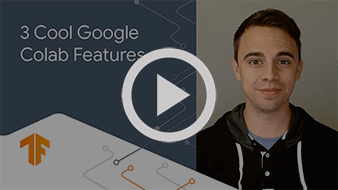
  </a>
</center>

In [ ]:
pip install pandas_ta vaderSentiment newspaper3k nltk

In [ ]:
import nltk
import spacy
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
from nltk.sentiment import SentimentIntensityAnalyzer
from typing import Tuple
import yfinance as yf
import concurrent.futures
import torch
import pandas as pd
from google.colab import files
import pandas_ta as ta
import numpy as np
import plotly.graph_objects as go
from scipy import stats
from tqdm import tqdm
import csv
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import re
from functools import reduce
import base64
import time
from textblob import TextBlob
from copy import deepcopy
import random
from newspaper import Article
import datetime
#from datetime import datetime, timedelta
import os
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

device = "cuda:0" if torch.cuda.is_available() else "cpu"
model.to(device)
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").to(device)
labels = ["positive", "negative", "neutral"]

def estimate_sentiment(news):
    if news:
        tokens = tokenizer(news, return_tensors="pt", padding=True).to(device)

        result = model(tokens["input_ids"], attention_mask=tokens["attention_mask"])["logits"]
        result = torch.nn.functional.softmax(torch.sum(result, 0), dim=-1)
        probability = result[torch.argmax(result)]
        sentiment = labels[torch.argmax(result)]
        return sentiment
    else:
        return labels[-1]

def sentiment_to_numeric(sentiment_label):
    if sentiment_label == "positive":
        return 1
    elif sentiment_label == "negative":
        return 0
    elif sentiment_label == "neutral":
        return 0
    else:
        return None

def main_function(company_symbol,start_date,end_date,interval,hernya):
  def fetch_and_save_data(company_symbol, start_date, end_date, interval):
    # Получаем исторические данные по заданным параметрам
    data = yf.download(company_symbol, start=start_date, end=end_date, interval=interval)
    if hernya == True:
      if data.index.tzinfo is None:
        data.index = data.index.tz_localize(pytz.utc)
      data.index = data.index.tz_convert(ny_tz)
    selected_columns = data[['Open', 'Close', 'High', 'Low', 'Volume', 'Adj Close']]

    selected_columns.to_csv('stock_data1000.csv')
    return 'stock_data1000.csv'

  here = fetch_and_save_data(company_symbol, start_date, end_date, interval = interval)
  here = pd.read_csv(f'{here}')
  if hernya == True:
      here['Datetime'] = here['Datetime'].str.replace('-04:00', '')
  print(here)
  if interval == '1d':
    here.rename(columns={'Date': 'Datetime'}, inplace=True)
  here.to_csv('here.csv', index=False)
  def kod1_candle(here, n2):
    df = pd.read_csv(f"{here}")

    def support(df1, l, n1, n2):  # n1 n2 before and after candle l
        for i in range(l - n1 + 1, l):
            if (df1.Low[i] > df1.Low[i - 1]):
                return 0
        for i in range(l + 1, l + n2 + 1):
            if (df1.Low[i] < df1.Low[i - 1]):
                return 0
        return 1

    def resistance(df1, l, n1, n2):  # n1 n2 before and after candle l
        for i in range(l - n1 + 1, l):
            if (df1.High[i] < df1.High[i - 1]):
                return 0
        for i in range(l + 1, l + n2 + 1):
            if (df1.High[i] > df1.High[i - 1]):
                return 0
        return 1

    length = len(df)
    high = list(df['High'])
    low = list(df['Low'])
    close = list(df['Close'])
    open = list(df['Open'])
    bodydiff = [0] * length

    highdiff = [0] * length
    lowdiff = [0] * length
    ratio1 = [0] * length
    ratio2 = [0] * length

    def isEngulfing(l):
        row = l
        bodydiff[row] = abs(open[row] - close[row])
        if bodydiff[row] < 0.000001:
            bodydiff[row] = 0.000001

        bodydiffmin = 0.002
        if (bodydiff[row] > bodydiffmin and bodydiff[row - 1] > bodydiffmin and
                open[row - 1] < close[row - 1] and
                open[row] > close[row] and
                (open[row] - close[row - 1]) >= -0e-5 and close[row] < open[row - 1]):  # +0e-5 -5e-5
            return 1

        elif (bodydiff[row] > bodydiffmin and bodydiff[row - 1] > bodydiffmin and
              open[row - 1] > close[row - 1] and
              open[row] < close[row] and
              (open[row] - close[row - 1]) <= +0e-5 and close[row] > open[row - 1]):  # -0e-5 +5e-5
            return 2
        else:
            return 0

    def isStar(l):
        bodydiffmin = 0.0020
        row = l
        highdiff[row] = high[row] - max(open[row], close[row])
        lowdiff[row] = min(open[row], close[row]) - low[row]
        bodydiff[row] = abs(open[row] - close[row])
        if bodydiff[row] < 0.000001:
            bodydiff[row] = 0.000001
        ratio1[row] = highdiff[row] / bodydiff[row]
        ratio2[row] = lowdiff[row] / bodydiff[row]

        if (ratio1[row] > 1 and lowdiff[row] < 0.2 * highdiff[row] and bodydiff[
            row] > bodydiffmin):  # and open[row]>close[row]):
            return 1
        elif (ratio2[row] > 1 and highdiff[row] < 0.2 * lowdiff[row] and bodydiff[
            row] > bodydiffmin):  # and open[row]<close[row]):
            return 2
        else:
            return 0

    def closeResistance(l, levels, lim):
        if len(levels) == 0:
            return 0
        c1 = abs(df.High[l] - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        c2 = abs(max(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        c3 = min(df.Open[l], df.Close[l]) < min(levels, key=lambda x: abs(x - df.High[l]))
        c4 = df.Low[l] < min(levels, key=lambda x: abs(x - df.High[l]))
        if ((c1 or c2) and c3 and c4):
            return 1
        else:
            return 0

    def closeSupport(l, levels, lim):
        if len(levels) == 0:
            return 0
        c1 = abs(df.Low[l] - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c2 = abs(min(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c3 = max(df.Open[l], df.Close[l]) > min(levels, key=lambda x: abs(x - df.Low[l]))
        c4 = df.High[l] > min(levels, key=lambda x: abs(x - df.Low[l]))
        if ((c1 or c2) and c3 and c4):
            return 1
        else:
            return 0

    n1 = 2
    n2 = 0
    backCandles = 45
    signal = [0] * length
    for row in range(backCandles, len(df) - n2):
        ss = []
        rr = []
        for subrow in range(row - backCandles + n1, row + 1):
            if support(df, subrow, n1, n2):
                ss.append(df.Low[subrow])
            if resistance(df, subrow, n1, n2):
                rr.append(df.High[subrow])
        # !!!! parameters
        if ((isEngulfing(row) == 1 or isStar(row) == 1) and closeResistance(row, rr, 150e-5)):  # and df.RSI[row]<30
            signal[row] = 1
        elif ((isEngulfing(row) == 2 or isStar(row) == 2) and closeSupport(row, ss, 150e-5)):  # and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    df[f'signal_kod1'] = signal
    return df

  def news_ton(here,company_symbol):
    df = pd.read_csv(f"{here}")
    df['Ton_news_1'] = 0
    df['Ton_news_2'] = 0
    df['Ton_news_3'] = 0
    df['Ton_news_4'] = 0
    query = "apple"
    lang = "en"
    num = 1
    count = 0
    title1 = " "
    ondel = 0
    headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9,ru-RU;q=0.8,ru;q=0.7,uk;q=0.6',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'Accept-Language': 'ru,en-US;q=0.5',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Pragma': 'no-cache',
    'Cache-Control': 'no-cache'
}
    def get_text_and_date(url):
     global ondel
     try:
        article = Article(url, language="en", headers=headers)
        article.download()
        article.parse()
        title = re.sub(r'\s+', ' ', article.title.strip()) if article.title else None
        text = re.sub(r'\s+', ' ', article.text.strip()) if article.text else None
        if text == None or title == None:
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')
            if title == None or len(title) <= 400:
                title = soup.title.string.strip() if soup.title else None
            if text == None or len(title) <= 400:
                text = ' '.join([re.sub(r'\s+', ' ', p.get_text()).strip() for p in soup.find_all('p')]).strip()
            if text == None or title == None:
                ondel += 1
                return None, None
        return title, text
     except Exception as e:
        print(f"Error: {e}")
        return None, None
  #if interval == '1h':
   #df['Datetime'] = pd.to_datetime(df['Datetime'].str.replace('-04:00', ''))
    print("PYS",df)
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    #df['Datetime'] = df['Datetime'].dt.tz_localize(None)
    def analyze_sentiment(text):
      doc = nlp(text)
      sum_sentiment = 0
      num_words = 0
      for token in doc:
        if token.is_alpha and token.has_vector:
            sum_sentiment += token.vector[0]
            num_words += 1
      if num_words == 0:
        return None
      average_sentiment = sum_sentiment / num_words
      normalized_sentiment = (average_sentiment + 1) / 2

      return normalized_sentiment
    def analyze_sentiment4(text):
      inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
      outputs = model(**inputs)
      probabilities = softmax(outputs.logits, dim=1).detach().numpy()[0]
      positive_probability = probabilities[1]
      return positive_probability

    def count_ton(data):
      blob = TextBlob(data)
      sentiment = blob.sentiment
      res1 = sentiment.polarity
      analyzer = SentimentIntensityAnalyzer()
      res2 = analyzer.polarity_scores(data)
      res2 = res2['compound']
      res3 = analyze_sentiment(data)
      res4 = analyze_sentiment4(data)
      print(res1, res2, res3, res4,'HERE')
      return res1, res2,  res3,  res4

    def round_time_to_interval(timestamp, interval_minutes):
     if interval_minutes == '1d':
        interval_minutes = int(interval_minutes[:-1])
        rounded_timestamp = timestamp.replace(hour=0, minute=0, second=0, microsecond=0)
        rounded_timestamp += datetime.timedelta(days=round(timestamp.hour / 24))
     else:
            interval_minutes = int(interval_minutes[:-1])
            rounded_timestamp = timestamp - datetime.timedelta(
            minutes=timestamp.minute % interval_minutes,
            seconds=timestamp.second,
            microseconds=timestamp.microsecond
        )
     return rounded_timestamp
    def save_to_csv(title, text, timestamp_str):
      timestamp = datetime.datetime.fromisoformat(timestamp_str)
      rounded_time = round_time_to_interval(timestamp, interval)
      print(rounded_time )
      rounded_time_str = rounded_time.strftime('%Y-%m-%d %H:%M:%S')  # Format the rounded time to a string
      data = title + text
      ton_news1,ton_news2,ton_news3,ton_news4 = count_ton(data)
      for i in range(len(df['Datetime'])):
       if str(df['Datetime'][i]) == str(rounded_time_str):
        print("HERTEBE")
        if df['Ton_news_1'][i] == 0:
           df['Ton_news_1'][i] = ton_news1
           df['Ton_news_2'][i] = ton_news2
           df['Ton_news_3'][i] = ton_news3
           df['Ton_news_4'][i] = ton_news4
        else:
          new_data1 = (df['Ton_news_1'][i] + ton_news1)/2
          new_data2 = (df['Ton_news_2'][i] + ton_news2)/2
          new_data3 = (df['Ton_news_3'][i] + ton_news3)/2
          new_data4 = (df['Ton_news_4'][i] + ton_news4)/2
          df['Ton_news_1'][i] = new_data1
          df['Ton_news_2'][i] = new_data2
          df['Ton_news_3'][i] = new_data3
          df['Ton_news_4'][i] = new_data4
      print(df[df.Ton_news_1!= 0])


    nyzno_zaregatsa = []
    def article_search(url):
     response = requests.get(url, headers=headers)
     if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        articles = soup.find_all("a", class_="JtKRv")
        date_elements = soup.find_all("time", class_="hvbAAd")
        for num_article in range(len(articles)):
            if num_article == 4:
              break
            article = articles[num_article]
            url = article.get("href")
            title1 = article.text
            parts = url.split("/")
            encoded_link = base64.urlsafe_b64decode(parts[-1]).decode('latin-1')
            pattern = re.compile(r'https?://[^\s]+')
            link = re.findall(pattern, encoded_link)
            for article_url in link:
                html_string = str(date_elements[num_article])
                match = re.search(r'datetime="([^"]+)"', html_string)
                datetime_str = match.group(1)
                parsed_datetime = datetime.datetime.fromisoformat(datetime_str[:-1])
                date_str = parsed_datetime.strftime('%Y-%m-%d')
                time_str = parsed_datetime.strftime('%H:%M')
                date = parsed_datetime.strftime('%Y-%m-%d %H:%M:%S')
                cleaned_urls = re.sub(r'Ò.*$', '', article_url)
                article_url = cleaned_urls
                time.sleep(random.uniform(1, 3))
                try:
                    article_response = requests.get(article_url, timeout=5, headers=headers)
                    if article_response.status_code == 200:
                        title, text = get_text_and_date(article_url)
                        if text == None or title == None:
                            continue

                        print( article_url, "--------------------LEn text^", len(text), "LEn title^", len(title))
                        save_to_csv(title,text,date)
                    else:
                        print(f"Ошибка: {article_response.status_code}")
                        if article_response.status_code == 401:
                            nyzno_zaregatsa.append(article_url)
                except requests.exceptions.RequestException as e:
                    print(f"Ошибка при запросе: {e}")
     else:
        print(f"Ошибка10000000000000: {response.status_code}")
     return df


    url = f"https://news.google.com/search?q={query}&hl={lang}-US&gl=US&ceid=US:en&num=1"
    print(url)
    otvet = article_search(url)
    print(num)
    return otvet

  here = news_ton('here.csv', company_symbol)
  here.to_csv('here.csv', index=False)
  df1 = kod1_candle('here.csv', 0)
  df1.to_csv('df1.csv', index=False)

  def kod2_candle(here):
    df = pd.read_csv(f"{here}")
    # Check if NA values are in data

    def pivotid(df1, l, n1, n2):  # n1 n2 before and after candle l
        if l - n1 < 0 or l >= len(df1):
            return 0

        pividlow = 1
        pividhigh = 1
        for i in range(l - n1, l + 1):
            if (df1.Low[l] > df1.Low[i]):
                pividlow = 0
            if (df1.High[l] < df1.High[i]):
                pividhigh = 0
        if pividlow and pividhigh:
            return 3
        elif pividlow:
            return 1
        elif pividhigh:
            return 2
        else:
            return 0

    df['signal_kod2'] = df.apply(lambda x: pivotid(df, x.name, 10, 0), axis=1)
    return df


  def kod3_candle(here):
    df = pd.read_csv(f"{here}")
    #df = df[df['Volume'] != 0]
    df.reset_index(inplace = True)
    df['EMA'] = ta.ema(df.Close, length=150)

    EMAsignal = [0] * len(df)
    backcandles = 15
    df['EMASignal'] = EMAsignal
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if max(df.Open[i], df.Close[i]) >= df.EMA[i]:
                dnt = 0
            if min(df.Open[i], df.Close[i]) <= df.EMA[i]:
                upt = 0
        if upt == 1 and dnt == 1:
            EMAsignal[row] = 3
        elif upt == 1:
            EMAsignal[row] = 1
        elif dnt == 1:
            EMAsignal[row] = 2

    def isPivot(candle, window):
        """
        function that detects if a candle is a pivot/fractal point
        args: candle index, window before and after candle to test if pivot
        returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
        """
        if candle - window < 0 or candle >= len(df):
            return 0

        pivotHigh = 2
        pivotLow = 1
        for i in range(candle - window, candle + 1):
            if df.iloc[candle].Low > df.iloc[i].Low:
                pivotLow = 0
            if df.iloc[candle].High < df.iloc[i].High:
                pivotHigh = 0
        if (pivotHigh and pivotLow):
            return 3
        elif pivotHigh:
            return pivotHigh
        elif pivotLow:
            return pivotLow
        else:
            return 0

    window = 10
    df['signal_kod3'] = df.apply(lambda x: isPivot(x.name, window), axis=1)
    del df['EMASignal']
    del df['EMA']
    return df


  def kod4_candle(dfSPY):
    dfSPY = pd.read_csv(f"{dfSPY}")
    dfSPY['EMA'] = ta.sma(dfSPY.Close, length=200)  # sma ema
    dfSPY['RSI'] = ta.rsi(dfSPY.Close, length=2)
    my_bbands = ta.bbands(dfSPY.Close, length=20, std=2.5)
    my_bbands[0:50]
    dfSPY = dfSPY.join(my_bbands)
    def addemasignal(df, backcandles):
        emasignal = [0] * len(df)
        for row in range(backcandles, len(df)):
            upt = 1
            dnt = 1
            for i in range(row - backcandles, row + 1):
                if df.High[i] >= df.EMA[i]:
                    dnt = 0
                if df.Low[i] <= df.EMA[i]:
                    upt = 0
            if upt == 1 and dnt == 1:
                # print("!!!!! check trend loop !!!!")
                emasignal[row] = 3
            elif upt == 1:
                emasignal[row] = 2
            elif dnt == 1:
                emasignal[row] = 1
        dfSPY['signal_kod4'] = emasignal

    addemasignal(dfSPY, 6)

    def addorderslimit(df, percent):
        ordersignal = [0] * len(df)
        for i in range(1, len(df)):  # EMASignal of previous candle!!! modified!!!
            if df.signal_kod4[i] == 2 and df.Close[i] <= df['BBL_20_2.5'][
                i]:  # and df.RSI[i]<=100: #Added RSI condition to avoid direct close condition
                ordersignal[i] = df.Close[i] - df.Close[i] * percent
            elif df.signal_kod4[i] == 1 and df.Close[i] >= df['BBU_20_2.5'][i]:  # and df.RSI[i]>=0:
                ordersignal[i] = df.Close[i] + df.Close[i] * percent
        dfSPY['ordersignal'] = ordersignal

    addorderslimit(dfSPY, 0.00)

    dfSPY[dfSPY.ordersignal != 0]

    def pointposbreak(x):
        if x['ordersignal'] != 0:
            return x['ordersignal']
        else:
            return np.nan

    dfSPY['pointposbreak'] = dfSPY.apply(lambda row: pointposbreak(row), axis=1)
    for i in range(0, len(dfSPY)):
        if dfSPY.signal_kod4[i] > 0 and dfSPY.ordersignal[i] > 0:
            continue
        else:
            dfSPY.signal_kod4[i] = 0
            dfSPY.ordersignal[i] = 0

    del dfSPY['pointposbreak']
    del dfSPY['EMA']
    del dfSPY['RSI']
    del dfSPY['BBL_20_2.5']
    del dfSPY['BBM_20_2.5']
    del dfSPY['BBU_20_2.5']
    del dfSPY['BBB_20_2.5']
    del dfSPY['BBP_20_2.5']
    del dfSPY['ordersignal']
    return dfSPY


  def kod5_candle(here):
    df = pd.read_csv(f"{here}")
    df['ATR'] = df.ta.atr(length=10)
    df['RSI'] = df.ta.rsi()

    def Revsignal1(df1):

        length = len(df1)
        high = list(df1['High'])
        low = list(df1['Low'])
        close = list(df1['Close'])
        open = list(df1['Open'])
        signal = [0] * length
        highdiff = [0] * length
        lowdiff = [0] * length
        bodydiff = [0] * length
        ratio1 = [0] * length
        ratio2 = [0] * length

        for row in range(0, length):

            highdiff[row] = high[row] - max(open[row], close[row])
            bodydiff[row] = abs(open[row] - close[row])
            if bodydiff[row] < 0.002:
                bodydiff[row] = 0.002
            lowdiff[row] = min(open[row], close[row]) - low[row]
            ratio1[row] = highdiff[row] / bodydiff[row]
            ratio2[row] = lowdiff[row] / bodydiff[row]

            # print(df.RSI[row])
            #  |
            # _|_
            # |__|
            # |
            #

            if (ratio1[row] > 2.5 and lowdiff[row] < 0.3 * highdiff[row] and bodydiff[row] > 0.03 and df.RSI[
                row] > 50 and
                    df.RSI[row] < 70):
                signal[row] = 1

            # elif (ratio2[row-1]>2.5 and highdiff[row-1]<0.23*lowdiff[row-1] and bodydiff[row-1]>0.03 and bodydiff[row]>0.04 and close[row]>open[row] and close[row]>high[row-1] and df.RSI[row]<55 and df.RSI[row]>30):
            #    signal[row] = 2
            # _|_
            # |__|
            # |
            # |

            elif (ratio2[row] > 2.5 and highdiff[row] < 0.23 * lowdiff[row] and bodydiff[row] > 0.03 and df.RSI[
                row] < 55 and df.RSI[row] > 30):
                signal[row] = 2
        return signal

    df['signal_kod5'] = Revsignal1(df)
    del df['ATR']
    del df['RSI']
    return df


  def kod6_candle(here):
    df = pd.read_csv(f"{here}")
    #df = df[df['Volume'] != 0]
    df.isna().sum()

    def pivotid(df1, l, n1, n2):  # n1 n2 before and after candle l
        if l - n1 < 0 or l>= len(df1):
            return 0

        pividlow = 1
        pividhigh = 1
        for i in range(l - n1, l + 1):
            if (df1.Low[l] > df1.Low[i]):
                pividlow = 0
            if (df1.High[l] < df1.High[i]):
                pividhigh = 0
        if pividlow and pividhigh:
            return 3
        elif pividlow:
            return 2
        elif pividhigh:
            return 1

        else:
            return 0

    df['signal_kod6'] = df.apply(lambda x: pivotid(df, x.name, 50, 0), axis=1)
    return df


  def kod7_candle(here):
    df = pd.read_csv(f"{here}")
    #df = df[df['Volume'] != 0]
    df['RSI'] = ta.rsi(df.Close, length=12)
    df['EMA'] = ta.ema(df.Close, length=100)
    df = df[0:5000]
    EMAsignal = [0] * len(df)
    backcandles = 15
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if max(df.Open[i], df.Close[i]) >= df.EMA[i]:
                dnt = 0
            if min(df.Open[i], df.Close[i]) <= df.EMA[i]:
                upt = 0
        if upt == 1 and dnt == 1:
            EMAsignal[row] = 3
        elif upt == 1:
            EMAsignal[row] = 1
        elif dnt == 1:
            EMAsignal[row] = 2

    df['EMASignal'] = EMAsignal

    def isPivot(candle, window):
        """
        function that detects if a candle is a pivot/fractal point
        args: candle index, window before and after candle to test if pivot
        returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
        """
        if candle - window < 0 or candle>= len(df):
            return 0

        pivotHigh = 2
        pivotLow = 1
        for i in range(candle - window, candle + 1):
            if df.iloc[candle].Low > df.iloc[i].Low:
                pivotLow = 0
            if df.iloc[candle].High < df.iloc[i].High:
                pivotHigh = 0
        if (pivotHigh and pivotLow):
            return 3
        elif pivotHigh:
            return pivotHigh
        elif pivotLow:
            return pivotLow
        else:
            return 0

    window = 6
    df['signal_kod7'] = df.apply(lambda x: isPivot(x.name, window), axis=1)
    del df['EMASignal']
    del df['RSI']
    del df['EMA']
    return df


  def kod8_candle(here):
    df = pd.read_csv(f"{here}")
    # Check if NA values are in data
    #df = df[df['Volume'] != 0]

    def support(df1, l, n1, n2):  # n1 n2 before and after candle l
        for i in range(l - n1 + 1, l + 1):
            if (df1.Low[i] > df1.Low[i - 1]):
                return 0
        for i in range(l + 1, l + 1):
            if (df1.Low[i] < df1.Low[i - 1]):
                return 0
        return 1

    def resistance(df1, l, n1, n2):  # n1 n2 before and after candle l
        for i in range(l - n1 + 1, l + 1):
            if (df1.High[i] < df1.High[i - 1]):
                return 0
        for i in range(l + 1, l + 1):
            if (df1.High[i] > df1.High[i - 1]):
                return 0
        return 1

    length = len(df)
    high = list(df['High'])
    low = list(df['Low'])
    close = list(df['Close'])
    open = list(df['Open'])
    bodydiff = [0] * length

    highdiff = [0] * length
    lowdiff = [0] * length
    ratio1 = [0] * length
    ratio2 = [0] * length

    def isEngulfing(l):
        row = l
        bodydiff[row] = abs(open[row] - close[row])
        if bodydiff[row] < 0.000001:
            bodydiff[row] = 0.000001

        bodydiffmin = 0.002
        if (bodydiff[row] > bodydiffmin and bodydiff[row - 1] > bodydiffmin and
                open[row - 1] < close[row - 1] and
                open[row] > close[row] and
                (open[row] - close[row - 1]) >= -0e-5 and close[row] < open[row - 1]):  # +0e-5 -5e-5
            return 1

        elif (bodydiff[row] > bodydiffmin and bodydiff[row - 1] > bodydiffmin and
              open[row - 1] > close[row - 1] and
              open[row] < close[row] and
              (open[row] - close[row - 1]) <= +0e-5 and close[row] > open[row - 1]):  # -0e-5 +5e-5
            return 2
        else:
            return 0

    def isStar(l):
        bodydiffmin = 0.0020
        row = l
        highdiff[row] = high[row] - max(open[row], close[row])
        lowdiff[row] = min(open[row], close[row]) - low[row]
        bodydiff[row] = abs(open[row] - close[row])
        if bodydiff[row] < 0.000001:
            bodydiff[row] = 0.000001
        ratio1[row] = highdiff[row] / bodydiff[row]
        ratio2[row] = lowdiff[row] / bodydiff[row]

        if (ratio1[row] > 1 and lowdiff[row] < 0.2 * highdiff[row] and bodydiff[
            row] > bodydiffmin):  # and open[row]>close[row]):
            return 1
        elif (ratio2[row] > 1 and highdiff[row] < 0.2 * lowdiff[row] and bodydiff[
            row] > bodydiffmin):  # and open[row]<close[row]):
            return 2
        else:
            return 0

    def closeResistance(l, levels, lim):
        if len(levels) == 0:
            return 0
        c1 = abs(df.High[l] - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        c2 = abs(max(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        c3 = min(df.Open[l], df.Close[l]) < min(levels, key=lambda x: abs(x - df.High[l]))
        c4 = df.Low[l] < min(levels, key=lambda x: abs(x - df.High[l]))
        if ((c1 or c2) and c3 and c4):
            return 1
        else:
            return 0

    def closeSupport(l, levels, lim):
        if len(levels) == 0:
            return 0
        c1 = abs(df.Low[l] - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c2 = abs(min(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c3 = max(df.Open[l], df.Close[l]) > min(levels, key=lambda x: abs(x - df.Low[l]))
        c4 = df.High[l] > min(levels, key=lambda x: abs(x - df.Low[l]))
        if ((c1 or c2) and c3 and c4):
            return 1
        else:
            return 0

    n1 = 2
    n2 = 0
    backCandles = 30
    signal = [0] * length

    for row in range(backCandles, len(df) - n2):
        ss = []
        rr = []
        for subrow in range(row - backCandles + n1, row + 1):
            if support(df, subrow, n1, n2):
                ss.append(df.Low[subrow])
            if resistance(df, subrow, n1, n2):
                rr.append(df.High[subrow])
        # !!!! parameters
        if ((isEngulfing(row) == 1 or isStar(row) == 1) and closeResistance(row, rr, 150e-5)):  # and df.RSI[row]<30
            signal[row] = 1
        elif ((isEngulfing(row) == 2 or isStar(row) == 2) and closeSupport(row, ss, 150e-5)):  # and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    df['signal_kod8'] = signal
    return df


  def kod9_candle(here):
    df = pd.read_csv(f"{here}")
    df['ma_20'] = df.Close.rolling(20).mean()
    df['vol'] = df.Close.rolling(20).std()
    df['upper_bb'] = df.ma_20 + (2 * df.vol)
    df['lower_bb'] = df.ma_20 - (2 * df.vol)
    df['rsi'] = ta.momentum.rsi(df.Close, window=6)
    conditions = [(df.rsi < 30) & (df.Close < df.lower_bb),
                  (df.rsi > 70) & (df.Close > df.upper_bb)]
    choices = [2, 1]
    df['signal_kod9'] = np.select(conditions, choices)
    del df['ma_20']
    del df['vol']
    del df['upper_bb']
    del df['lower_bb']
    del df['rsi']
    return df


  def kod10_candle(here):
    data = pd.read_csv(f"{here}")
    def bollinger_bands(data, window_size=30):
        rolling_mean = data['Close'].rolling(window=window_size).mean()
        rolling_std = data['Close'].rolling(window=window_size).std()
        data['UpperBand'] = rolling_mean + (2 * rolling_std)
        data['LowerBand'] = rolling_mean - (2 * rolling_std)
        return data

    def RSI(data, window=13):
        delta = data['Close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window).mean()
        avg_loss = loss.rolling(window).mean()
        RS = avg_gain / avg_loss
        RSI = 100 - (100 / (1 + RS))
        data['RSI'] = RSI
        data['Overbought'] = 70
        data['Oversold'] = 30
        return data

    def strategy(data):
        position = 0
        buy_price = []
        for i in range(len(data)):
            if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
                position = 1
                buy_price.append(2)
            elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
                position = 0
                buy_price.append(1)
            else:
                buy_price.append(0)
        return buy_price

    data = bollinger_bands(data)
    data = RSI(data)
    signal = strategy(data)
    data['signal_kod10'] = signal
    del data['UpperBand']
    del data['LowerBand']
    del data['RSI']
    del data['Overbought']
    del data['Oversold']
    return data


  def kod11_candle(here):
    df = pd.read_csv(f"{here}")
    #df = df[df['Volume'] != 0]
    df.isna().sum()
    df['RSI'] = ta.rsi(df.Close, length=12)
    wick_threshold = 0.0001

    def support(df1, l, n1, n2):  # n1 n2 before and after candle l
        if (df1.Low[l - n1:l].min() < df1.Low[l] or
                df1.Low[l + 1:l + 1].min() < df1.Low[l]):
            return 0

        candle_body = abs(df1.Open[l] - df1.Close[l])
        lower_wick = min(df1.Open[l], df1.Close[l]) - df1.Low[l]
        if (lower_wick > candle_body) and (lower_wick > wick_threshold):
            return 1

        return 0

    def resistance(df1, l, n1, n2):  # n1 n2 before and after candle l
        if (df1.High[l - n1:l].max() > df1.High[l] or
                df1.High[l + 1:l + 1].max() > df1.High[l]):
            return 0

        candle_body = abs(df1.Open[l] - df1.Close[l])
        upper_wick = df1.High[l] - max(df1.Open[l], df1.Close[l])
        if (upper_wick > candle_body) and (upper_wick > wick_threshold):
            return 1

        return 0

    def closeResistance(l, levels, lim, df):
        if len(levels) == 0:
            return 0
        c1 = abs(df.High[l] - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        c2 = abs(max(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        c3 = min(df.Open[l], df.Close[l]) < min(levels, key=lambda x: abs(x - df.High[l]))
        c4 = df.Low[l] < min(levels, key=lambda x: abs(x - df.High[l]))
        if ((c1 or c2) and c3 and c4):
            return min(levels, key=lambda x: abs(x - df.High[l]))
        else:
            return 0

    def closeSupport(l, levels, lim, df):
        if len(levels) == 0:
            return 0
        c1 = abs(df.Low[l] - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c2 = abs(min(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c3 = max(df.Open[l], df.Close[l]) > min(levels, key=lambda x: abs(x - df.Low[l]))
        c4 = df.High[l] > min(levels, key=lambda x: abs(x - df.Low[l]))
        if ((c1 or c2) and c3 and c4):
            return min(levels, key=lambda x: abs(x - df.Low[l]))
        else:
            return 0

    def is_below_resistance(l, level_backCandles, level, df):
        return df.loc[l - level_backCandles:l - 1, 'High'].max() < level

    def is_above_support(l, level_backCandles, level, df):
        return df.loc[l - level_backCandles:l - 1, 'Low'].min() > level

    def check_candle_signal(l, n1, n2, backCandles, df):
        ss = []
        rr = []
        for subrow in range(l - backCandles, l - n2):
            if support(df, subrow, n1, n2):
                ss.append(df.Low[subrow])
            if resistance(df, subrow, n1, n2):
                rr.append(df.High[subrow])

        ss.sort()
        for i in range(1, len(ss)):
            if (i >= len(ss)):
                break
            if abs(ss[i] - ss[i - 1]) <= 0.0001:
                ss.pop(i)

        rr.sort(reverse=True)
        for i in range(1, len(rr)):
            if (i >= len(rr)):
                break
            if abs(rr[i] - rr[i - 1]) <= 0.0001:
                rr.pop(i)

        rrss = rr + ss
        rrss.sort()
        for i in range(1, len(rrss)):
            if (i >= len(rrss)):
                break
            if abs(rrss[i] - rrss[i - 1]) <= 0.0001:
                rrss.pop(i)
        cR = closeResistance(l, rrss, 150e-5, df)
        cS = closeSupport(l, rrss, 150e-5, df)

        if (cR and is_below_resistance(l, 6, cR, df) and df.RSI[l - 1:l].min() < 45):
            return 1
        elif (cS and is_above_support(l, 6, cS, df) and df.RSI[l - 1:l].max() > 55):
            return 2
        else:
            return 0

    n1 = 8
    n2 = 0
    backCandles = 140
    signal = [0 for i in range(len(df))]
    for row in tqdm(range(backCandles + n1, len(df) - n2)):
        signal[row] = check_candle_signal(row, n1, n2, backCandles, df)
    df['signal_kod11rare1h'] = signal
    del df['RSI']
    return df

  def kod12_candle(here):
    dfSPY = pd.read_csv(f"{here}")
    dfSPY['EMA'] = ta.ema(dfSPY.Close, length=200)  # sma ema
    dfSPY['RSI'] = ta.rsi(dfSPY.Close, length=2)
    my_bbands = ta.bbands(dfSPY.Close, length=20, std=2.5)
    my_bbands[0:50]
    dfSPY = dfSPY.join(my_bbands)

    def addemasignal(df, backcandles):
        emasignal = [0] * len(df)
        for row in range(backcandles, len(df)):
            upt = 1
            dnt = 1
            for i in range(row - backcandles, row + 1):
                if df.High[i] >= df.EMA[i]:
                    dnt = 0
                if df.Low[i] <= df.EMA[i]:
                    upt = 0
            if upt == 1 and dnt == 1:
                # print("!!!!! check trend loop !!!!")
                emasignal[row] = 0
            elif upt == 1:
                emasignal[row] = 1
            elif dnt == 1:
                emasignal[row] = 2
        df['signal_kod12'] = emasignal

    addemasignal(dfSPY, 0)
    del dfSPY['EMA']
    del dfSPY['RSI']
    del dfSPY['BBL_20_2.5']
    del dfSPY['BBM_20_2.5']
    del dfSPY['BBU_20_2.5']
    del dfSPY['BBB_20_2.5']
    del dfSPY['BBP_20_2.5']
    return dfSPY


  def kod13_candle(here):
    df = pd.read_csv(f"{here}")

    def isPivot(candle, window):
        """
        function that detects if a candle is a pivot/fractal point
        args: candle index, window before and after candle to test if pivot
        returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
        """
        if candle - window < 0 or candle >= len(df):
            return 0

        pivotHigh = 1
        pivotLow = 2
        for i in range(candle - window, candle  + 1):
            if df.iloc[candle].Low > df.iloc[i].Low:
                pivotLow = 0
            if df.iloc[candle].High < df.iloc[i].High:
                pivotHigh = 0
        if (pivotHigh and pivotLow):
            return 0
        elif pivotHigh:
            return pivotHigh
        elif pivotLow:
            return pivotLow
        else:
            return 0

    def collect_channel(candle, backcandles, window, parallel):
        localdf = df[candle - backcandles - window:candle - window]
        localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name, window), axis=1)
        highs = localdf[localdf['isPivot'] == 1].High.values[-3:]
        idxhighs = localdf[localdf['isPivot'] == 1].High.index[-3:]
        lows = localdf[localdf['isPivot'] == 2].Low.values[-3:]
        idxlows = localdf[localdf['isPivot'] == 2].Low.index[-3:]
        total_length = len(lows) + len(highs)
        if len(lows) >= 2 and len(highs) >= 2 and total_length >= 5:
            sl_lows, interc_lows, r_value_l, _, _ = stats.linregress(idxlows, lows)
            sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs, highs)

            if not (parallel > 0) or abs((sl_lows - sl_highs) / (sl_highs + sl_lows) / 2) < parallel:
                return (sl_lows, interc_lows, sl_highs, interc_highs, r_value_l ** 2, r_value_h ** 2)
        return (0, 0, 0, 0, 0, 0)

    backcandles = 40
    window = 0
    df['signal_kod13_1'] = df.apply(lambda x: isPivot(x.name, window), axis=1)

    def isBreakOut(candle, backcandles, window, parallel):
        if (candle - backcandles - window) < 0:
            return 0

        sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = collect_channel(candle,
                                                                                       backcandles,
                                                                                       window,
                                                                                       parallel=parallel)

        prev_idx = candle - 1
        prev_high = df.iloc[candle - 1].High
        prev_low = df.iloc[candle - 1].Low
        prev_close = df.iloc[candle - 1].Close

        curr_idx = candle
        curr_high = df.iloc[candle].High
        curr_low = df.iloc[candle].Low
        curr_close = df.iloc[candle].Close
        curr_open = df.iloc[candle].Open

        if (  # prev_high > (sl_lows*prev_idx + interc_lows) and
                # prev_close < (sl_lows*prev_idx + interc_lows) and
                curr_open < (sl_lows * curr_idx + interc_lows) and
                curr_close < (sl_lows * prev_idx + interc_lows) and
                r_sq_l > 0.9 and r_sq_h > 0.9):
            return 1

        elif (  # prev_low < (sl_highs*prev_idx + interc_highs) and
                # prev_close > (sl_highs*prev_idx + interc_highs) and
                curr_open > (sl_highs * curr_idx + interc_highs) and
                curr_close > (sl_highs * prev_idx + interc_highs) and
                r_sq_h > 0.9 and r_sq_l > 0.9):
            return 2

        else:
            return 0

    df["signal_kod13_2"] = [isBreakOut(candle, backcandles, window, parallel=0.1) for candle in tqdm(df.index)]
    return df


  def kod14_candle(here):
    df = pd.read_csv(f"{here}")
    #df = df[df['Volume'] != 0]
    df["EMA"] = ta.ema(df.Close, length=100)
    df['ATR'] = df.ta.atr()
    emasignal = [0] * len(df)
    backcandles = 4
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if df.High[i] >= df.EMA[i]:
                dnt = 0
            if df.Low[i] <= df.EMA[i]:
                upt = 0
        if upt == 1 and dnt == 1:
            # print("!!!!! check trend loop !!!!")
            emasignal[row] = 0
        elif upt == 1:
            emasignal[row] = 1
        elif dnt == 1:
            emasignal[row] = 2

    df['signal_kod14'] = emasignal
    del df["EMA"]
    del df['ATR']
    return df


  def kod15_candle(here):
    df = pd.read_csv(f"{here}")
    #df = df[df['Volume'] != 0]
    df["EMA50"] = ta.ema(df.Close, length=50)
    df["EMA100"] = ta.ema(df.Close, length=100)
    df["EMA150"] = ta.ema(df.Close, length=150)
    df['ATR'] = df.ta.atr()
    backrollingN = 10
    # backrollingN = 30 or 40(40 pbetter)
    df['slopeEMA50'] = df['EMA50'].diff(periods=1)
    df['slopeEMA50'] = df['slopeEMA50'].rolling(window=backrollingN).mean()
    df['slopeEMA100'] = df['EMA100'].diff(periods=1)
    df['slopeEMA100'] = df['slopeEMA100'].rolling(window=backrollingN).mean()
    df['slopeEMA150'] = df['EMA150'].diff(periods=1)
    df['slopeEMA150'] = df['slopeEMA150'].rolling(window=backrollingN).mean()
    conditions = [
        ((df['EMA50'] < df['EMA100']) & (df['EMA100'] < df['EMA150']) & (df['slopeEMA50'] < 0) & (
                df['slopeEMA100'] < 0) & (df['slopeEMA150'] < 0)),
        ((df['EMA50'] > df['EMA100']) & (df['EMA100'] > df['EMA150']) & (df['slopeEMA50'] > 0) & (
                df['slopeEMA100'] > 0) & (df['slopeEMA150'] > 0))]
    choices = [1, 2]
    df['EMAsignal'] = np.select(conditions, choices, default=0)
    TotSignal = [0] * len(df)
    wicklimit = 2e-5
    for row in range(0, len(df)):
        TotSignal[row] = 0
        if df.EMAsignal[row] == 1 and df.Open[row] > df.EMA50[row] and df.Close[row] < df.EMA50[row] and df.High[row] - \
                df.Open[row] <= wicklimit:
            TotSignal[row] = 1
        if df.EMAsignal[row] == 2 and df.Open[row] < df.EMA50[row] and df.Close[row] > df.EMA50[row] and df.Open[row] - \
                df.Low[row] <= wicklimit:
            TotSignal[row] = 2
    df['signal_kod15'] = TotSignal
    del df['EMA50']
    del df['EMA100']
    del df['EMA150']
    del df['ATR']
    del df['EMAsignal']
    del df['slopeEMA50']
    del df['slopeEMA100']
    del df['slopeEMA150']
    return df


  def kod16_candle(here):
    df = pd.read_csv(f"{here}")
    df["EMA200"] = ta.ema(df.Close, length=200)
    df["RSI"] = ta.rsi(df.Close, length=3)
    df['ATR'] = df.ta.atr()
    emasignal = [0] * len(df)
    backcandles = 8

    for row in range(backcandles - 1, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if df.High[row] >= df.EMA200[row]:
                dnt = 0
            if df.Low[row] <= df.EMA200[row]:
                upt = 0
        if upt == 1 and dnt == 1:
            # print("!!!!! check trend loop !!!!")
            emasignal[row] = 3
        elif upt == 1:
            emasignal[row] = 2
        elif dnt == 1:
            emasignal[row] = 1

    df['EMAsignal'] = emasignal
    TotSignal = [0] * len(df)
    for row in range(0, len(df)):
        TotSignal[row] = 0
        if df.EMAsignal[row] == 1 and df.RSI[row] >= 90:
            TotSignal[row] = 1
        if df.EMAsignal[row] == 2 and df.RSI[row] <= 10:
            TotSignal[row] = 2

    df['signal_kod16'] = TotSignal
    del df['EMAsignal']
    return df


  def kod17_candle(here):
    df = pd.read_csv(f"{here}")
    df["EMA"] = ta.ema(df.Close, length=200)
    df['ATR'] = df.ta.atr()
    emasignal = [0] * len(df)
    backcandles = 4
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if df.High[i] >= df.EMA[i]:
                dnt = 0
            if df.Low[i] <= df.EMA[i]:
                upt = 0
        if upt == 1 and dnt == 1:
            # print("!!!!! check trend loop !!!!")
            emasignal[row] = 3
        elif upt == 1:
            emasignal[row] = 2
        elif dnt == 1:
            emasignal[row] = 1

    df['EMASignal'] = emasignal
    VSignal = [0] * len(df)
    vbackcandles = 1
    for row in range(vbackcandles + 1, len(df)):
        VSignal[row] = 1
        for i in range(row - vbackcandles, row + 1):
            if df.Volume[row] < df.Volume[i] and df.Volume[row - 1] < df.Volume[row - 2]:
                VSignal[row] = 0
    df['signal_kod17_1'] = VSignal
    PriceSignal = [0] * len(df)
    pbackcandles = 4
    for row in range(pbackcandles, len(df)):
        PriceSignal[row] = 1
        for i in range(row - pbackcandles, row + 1):
            if df.EMASignal[row] == 1:  # downtrend
                if df.Open[row] <= df.Close[row]:  # downcandle row
                    PriceSignal[row] = 0
                elif df.Open[i] > df.Close[i]:  # downcandle i we are looking for 4 upcandles
                    PriceSignal[row] = 0
            if df.EMASignal[row] == 2:  # uptrend
                if df.Open[row] >= df.Close[row]:  # upcandle row
                    PriceSignal[row] = 0
                elif df.Open[i] < df.Close[i]:  # upcandle i we are looking for 4 dowcandles
                    PriceSignal[row] = 0
            else:
                PriceSignal[row] = 0

    df['PriceSignal'] = PriceSignal
    TotSignal = [0] * len(df)
    for row in range(0, len(df)):
        if df.EMASignal[row] == 1 and df.signal_kod17_1[row] == 1 and df.PriceSignal[row] == 1:
            TotSignal[row] = 1
        if df.EMASignal[row] == 2 and df.signal_kod17_1[row] == 1 and df.PriceSignal[row] == 1:
            TotSignal[row] = 2

    df['signal_kod17_2'] = TotSignal
    del df['PriceSignal']
    del df['EMASignal']
    del df['EMA200']
    del df['RSI']
    del df['ATR']
    del df['EMA']

    return df


  def kod18_candle(here):
    df = pd.read_csv(f"{here}")
    df['ATR'] = ta.atr(high=df.High, low=df.Low, close=df.Close, length=14)

    def support(df1, l, n1, n2):  # n1 n2 before and after candle l
        for i in range(l - n1 + 1, l + 1):
            if (df1.Low[i] > df1.Low[i - 1]):
                return 0
        for i in range(l + 1, l + 1):
            if (df1.Low[i] < df1.Low[i - 1]):
                return 0
        return 1

    def resistance(df1, l, n1, n2):  # n1 n2 before and after candle l
        for i in range(l - n1 + 1, l + 1):
            if (df1.High[i] < df1.High[i - 1]):
                return 0
        for i in range(l + 1, l + 1):
            if (df1.High[i] > df1.High[i - 1]):
                return 0
        return 1

    length = len(df)
    high = list(df['High'])
    low = list(df['Low'])
    close = list(df['Close'])
    open = list(df['Open'])
    bodydiff = [0] * length

    highdiff = [0] * length
    lowdiff = [0] * length
    ratio1 = [0] * length
    ratio2 = [0] * length

    mybodydiff = 0.000001
    mybodydiffmin = 0.002

    def isEngulfing(l):
        row = l
        bodydiff[row] = abs(open[row] - close[row])
        if bodydiff[row] < mybodydiff:
            bodydiff[row] = mybodydiff

        bodydiffmin = mybodydiffmin
        if (bodydiff[row] > bodydiffmin and bodydiff[row - 1] > bodydiffmin and
                open[row - 1] < close[row - 1] and
                open[row] > close[row] and
                (open[row] - close[row - 1]) >= -0e-5 and close[row] < open[row - 1]):  # +0e-5 -5e-5
            return 1

        elif (bodydiff[row] > bodydiffmin and bodydiff[row - 1] > bodydiffmin and
              open[row - 1] > close[row - 1] and
              open[row] < close[row] and
              (open[row] - close[row - 1]) <= +0e-5 and close[row] > open[row - 1]):  # -0e-5 +5e-5
            return 2
        else:
            return 0

    def isStar(l):
        bodydiffmin = mybodydiffmin
        row = l
        highdiff[row] = high[row] - max(open[row], close[row])
        lowdiff[row] = min(open[row], close[row]) - low[row]
        bodydiff[row] = abs(open[row] - close[row])
        if bodydiff[row] < mybodydiff:
            bodydiff[row] = mybodydiff
        ratio1[row] = highdiff[row] / bodydiff[row]
        ratio2[row] = lowdiff[row] / bodydiff[row]

        if (ratio1[row] > 1 and lowdiff[row] < 0.2 * highdiff[row] and bodydiff[
            row] > bodydiffmin):  # and open[row]>close[row]):
            return 1
        elif (ratio2[row] > 1 and highdiff[row] < 0.2 * lowdiff[row] and bodydiff[
            row] > bodydiffmin):  # and open[row]<close[row]):
            return 2
        else:
            return 0

    def closeResistance(l, levels, lim):
        if len(levels) == 0:
            return 0
        # !!!
        # lim=df.ATR[l]/2

        # diff between high and closest level among levels
        c1 = abs(df.High[l] - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        # diff between higher body and closest level to high
        c2 = abs(max(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.High[l]))) <= lim
        # min body less than closest level to high
        c3 = min(df.Open[l], df.Close[l]) < min(levels, key=lambda x: abs(x - df.High[l]))
        # low price less than closest level to high
        c4 = df.Low[l] < min(levels, key=lambda x: abs(x - df.High[l]))
        if ((c1 or c2) and c3 and c4):
            return 1
        else:
            return 0

    def closeSupport(l, levels, lim):
        if len(levels) == 0:
            return 0
        # !!!
        # lim=df.ATR[l]/2
        c1 = abs(df.Low[l] - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c2 = abs(min(df.Open[l], df.Close[l]) - min(levels, key=lambda x: abs(x - df.Low[l]))) <= lim
        c3 = max(df.Open[l], df.Close[l]) > min(levels, key=lambda x: abs(x - df.Low[l]))
        c4 = df.High[l] > min(levels, key=lambda x: abs(x - df.Low[l]))
        if ((c1 or c2) and c3 and c4):
            return 1
        else:
            return 0

    n1 = 2
    n2 = 0
    backCandles = 45
    signal = [0] * length
    for row in range(backCandles, len(df) - n2):
        ss = []
        rr = []
        for subrow in range(row - backCandles + n1, row + 1):
            if support(df, subrow, n1, n2):
                ss.append(df.Low[subrow])
            if resistance(df, subrow, n1, n2):
                rr.append(df.High[subrow])

        # !!!! parameters
        myclosedistance = 150e-5  # EURUSD
        if ((isEngulfing(row) == 1 or isStar(row) == 1) and closeResistance(row, rr,
                                                                            myclosedistance)):  # and df.RSI[row]<30
            signal[row] = 1
        elif ((isEngulfing(row) == 2 or isStar(row) == 2) and closeSupport(row, ss,
                                                                           myclosedistance)):  # and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    df['signal_kod18'] = signal
    del df['ATR']
    return df


  def kod19_candle(here):
    df = pd.read_csv(f"{here}")
    # df.ta.indicators()
    # help(ta.rsi)
    df['RSI'] = df.ta.rsi(length=14)

    def myRSI(price, n=20):
        delta = price['Close'].diff()
        dUp, dDown = delta.copy(), delta.copy()
        dUp[dUp < 0] = 0
        dDown[dDown > 0] = 0

        RolUp = dUp.rolling(window=n).mean()
        RolDown = dDown.rolling(window=n).mean().abs()

        RS = RolUp / RolDown
        rsi = 100.0 - (100.0 / (1.0 + RS))
        return rsi

    # df['RSI'] = myRSI(df)
    def pivotid(df1, l, n1, n2, low, high):  # n1 n2 before and after candle l
        if l - n1 < 0 or l + n2 >= len(df1):
            return 0

        pividlow = 1
        pividhigh = 1
        for i in range(l - n1, l + 1):
            if (df1.Low[l] > df1.Low[i]):
                pividlow = 0
            if (df1.High[l] < df1.High[i]):
                pividhigh = 0
        if pividlow and pividhigh:
            return 3
        elif pividlow:
            return low
        elif pividhigh:
            return high
        else:
            return 0

    def RSIpivotid(df1, l, n1, n2, low, high):  # n1 n2 before and after candle l
        if l - n1 < 0 or l + n2 >= len(df1):
            return 0

        pividlow = 1
        pividhigh = 1
        for i in range(l - n1, l + 1):
            if (df1.RSI[l] > df1.RSI[i]):
                pividlow = 0
            if (df1.RSI[l] < df1.RSI[i]):
                pividhigh = 0
        if pividlow and pividhigh:
            return 3
        elif pividlow:
            return low
        elif pividhigh:
            return high
        else:
            return 0

            # pivotid(df,28145,5,5)

    df['pivot'] = df.apply(lambda x: pivotid(df, x.name, 5, 0, 1, 2), axis=1)
    df['RSIpivot'] = df.apply(lambda x: RSIpivotid(df, x.name, 5, 0, 1, 2), axis=1)
    backcandles = 60
    # candleid = 8800
    candleid = 85
    maxim = np.array([])
    minim = np.array([])
    xxmin = np.array([])
    xxmax = np.array([])

    maximRSI = np.array([])
    minimRSI = np.array([])
    xxminRSI = np.array([])
    xxmaxRSI = np.array([])
    for i in range(candleid - backcandles, candleid + 1):
        if df.iloc[i].pivot == 1:
            minim = np.append(minim, df.iloc[i].Low)
            xxmin = np.append(xxmin, i)  # could be i instead df.iloc[i].name
        if df.iloc[i].pivot == 2:
            maxim = np.append(maxim, df.iloc[i].High)
            xxmax = np.append(xxmax, i)  # df.iloc[i].name
        if df.iloc[i].RSIpivot == 1:
            minimRSI = np.append(minimRSI, df.iloc[i].RSI)
            xxminRSI = np.append(xxminRSI, df.iloc[i].name)
        if df.iloc[i].RSIpivot == 2:
            maximRSI = np.append(maximRSI, df.iloc[i].RSI)
            xxmaxRSI = np.append(xxmaxRSI, df.iloc[i].name)

    slmin, intercmin = np.polyfit(xxmin, minim, 1)
    slmax, intercmax = np.polyfit(xxmax, maxim, 1)
    slminRSI, intercminRSI = np.polyfit(xxminRSI, minimRSI, 1)
    slmaxRSI, intercmaxRSI = np.polyfit(xxmaxRSI, maximRSI, 1)

    def divsignal(x, nbackcandles):
        backcandles = nbackcandles
        candleid = int(x.name)

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        maximRSI = np.array([])
        minimRSI = np.array([])
        xxminRSI = np.array([])
        xxmaxRSI = np.array([])

        for i in range(candleid - backcandles, candleid + 1):
            if df.iloc[i].pivot == 1:
                minim = np.append(minim, df.iloc[i].Low)
                xxmin = np.append(xxmin, i)  # could be i instead df.iloc[i].name
            if df.iloc[i].pivot == 2:
                maxim = np.append(maxim, df.iloc[i].High)
                xxmax = np.append(xxmax, i)  # df.iloc[i].name
            if df.iloc[i].RSIpivot == 1:
                minimRSI = np.append(minimRSI, df.iloc[i].RSI)
                xxminRSI = np.append(xxminRSI, df.iloc[i].name)
            if df.iloc[i].RSIpivot == 2:
                maximRSI = np.append(maximRSI, df.iloc[i].RSI)
                xxmaxRSI = np.append(xxmaxRSI, df.iloc[i].name)

        if maxim.size < 2 or minim.size < 2 or maximRSI.size < 2 or minimRSI.size < 2:
            return 0

        slmin, intercmin = np.polyfit(xxmin, minim, 1)
        slmax, intercmax = np.polyfit(xxmax, maxim, 1)
        slminRSI, intercminRSI = np.polyfit(xxminRSI, minimRSI, 1)
        slmaxRSI, intercmaxRSI = np.polyfit(xxmaxRSI, maximRSI, 1)

        if slmin > 1e-4 and slmax > 1e-4 and slmaxRSI < -0.1:
            return 1
        elif slmin < -1e-4 and slmax < -1e-4 and slminRSI > 0.1:
            return 2
        else:
            return 0

    df['divSignal'] = df.apply(lambda row: divsignal(row, 30), axis=1)

    def divsignal2(x, nbackcandles):
        backcandles = nbackcandles
        candleid = int(x.name)

        closp = np.array([])
        xxclos = np.array([])

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        maximRSI = np.array([])
        minimRSI = np.array([])
        xxminRSI = np.array([])
        xxmaxRSI = np.array([])

        for i in range(candleid - backcandles, candleid + 1):
            closp = np.append(closp, df.iloc[i].Close)
            xxclos = np.append(xxclos, i)
            if df.iloc[i].pivot == 1:
                minim = np.append(minim, df.iloc[i].Low)
                xxmin = np.append(xxmin, i)  # could be i instead df.iloc[i].name
            if df.iloc[i].pivot == 2:
                maxim = np.append(maxim, df.iloc[i].High)
                xxmax = np.append(xxmax, i)  # df.iloc[i].name
            if df.iloc[i].RSIpivot == 1:
                minimRSI = np.append(minimRSI, df.iloc[i].RSI)
                xxminRSI = np.append(xxminRSI, df.iloc[i].name)
            if df.iloc[i].RSIpivot == 2:
                maximRSI = np.append(maximRSI, df.iloc[i].RSI)
                xxmaxRSI = np.append(xxmaxRSI, df.iloc[i].name)

        slclos, interclos = np.polyfit(xxclos, closp, 1)

        if slclos > 1e-4 and (maximRSI.size < 2 or maxim.size < 2):
            return 0
        if slclos < -1e-4 and (minimRSI.size < 2 or minim.size < 2):
            return 0
        # signal decisions here !!!
        if slclos > 1e-4:
            if maximRSI[-1] < maximRSI[-2] and maxim[-1] > maxim[-2]:
                return 1
        elif slclos < -1e-4:
            if minimRSI[-1] > minimRSI[-2] and minim[-1] < minim[-2]:
                return 2
        else:
            return 0

    df['divSignal2'] = df.apply(lambda row: divsignal2(row, 30), axis=1)
    df['signal_kod19'] = df['RSIpivot'].copy()
    df['signal_kod19_1'] = df['divSignal'].copy()
    df['signal_kod19_2'] = df['divSignal2'].copy()

    del df['signal_kod19_2']


    del df['RSIpivot']
    del df['divSignal']
    del df['divSignal2']
    del df['pivot']
    del df['RSI']
    return df


  def kod20_candle(here):
    df = pd.read_csv(f"{here}")

    def create_atr(df, period):
        high = df['High']
        low = df['Low']
        prev_close = df['Close'].shift(1)
        tr_values = np.maximum.reduce([
            high - low,
            np.abs(high - prev_close),
            np.abs(low - prev_close)])

        atr = pd.Series(tr_values).rolling(window=period).mean()
        atr = atr.iloc[-1]
        df['atr'] = atr
        df['StopLoss'] = df['Close'].iloc[-1] - df['atr'].iloc[-1] * 2
        return df

    def get_quote(ticker):
        table = yf.get_quote_table(ticker)
        quote = table.get('Quote Price')
        prevc = table.get('Previous Close')
        per_chg = round(((quote - prevc) / prevc) * 100, 2)
        arrow = percent_change_symbol(per_chg)
        change = str(per_chg) + '% ' + arrow
        quote = "{:, }".format(round(quote, 2))
        return ticker, quote, change

    def percent_change_symbol(change):
        if change < 0:
            arrow = 'v'
        elif change > 0:
            arrow = 'A'
        else:
            arrow = "-"
        return arrow

    def ema(df, field, period):
        ema = df[f'{field}'].ewm(span=period, adjust=False).mean()
        return ema

    def create_ema_and_bollinger_bands(df, period=20):
        df[f'exp{period}'] = ema(df, 'Close', period)
        df[f'std_dev{period}'] = df[f'exp{period}'].std()
        df[f'upper_band{period}'] = df[f'exp{period}'] + df[f'std_dev{period}']
        df[f'lower_band{period}'] = df[f'exp{period}'] - df[f'std_dev{period}']
        return df

    def mean_reversion_algorithm(df):
        df = create_ema_and_bollinger_bands(df, period=128)
        df = create_atr(df, 5)
        action = []
        low = df['Low']
        high = df['High']
        close = df['Close']
        bollingerlower = df['lower_band128']
        bollingerupper = df['upper_band128']

        for i in range(len(df)):
            low_val = low[i]
            high_val = high[i]
            close_val = close[i]
            bollingerlower_val = bollingerlower[i]
            bollingerupper_val = bollingerupper[i]

            bullish_mean_reversion = close_val < bollingerlower_val

            bearish_mean_reversion = close_val > bollingerupper_val

            if bullish_mean_reversion:
                action.append(2)
            elif bearish_mean_reversion:
                action.append(1)

            else:
                action.append(0)

        df['signal_kod20'] = action
        return df

    df = mean_reversion_algorithm(df)
    del df['exp128']
    del df['std_dev128']
    del df['upper_band128']
    del df['lower_band128']
    del df['atr']
    del df['StopLoss']
    return df


  def kod21_candle(here):
    df = pd.read_csv(f"{here}")
    df['RSI'] = ta.rsi(df.Close, length=12)
    df['EMA'] = ta.ema(df.Close, length=150)
    EMAsignal = [0] * len(df)
    backcandles = 15
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if max(df.Open[i], df.Close[i]) >= df.EMA[i]:
                dnt = 0
            if min(df.Open[i], df.Close[i]) <= df.EMA[i]:
                upt = 0
        if upt == 1 and dnt == 1:
            EMAsignal[row] = 3
        elif upt == 1:
            EMAsignal[row] = 2
        elif dnt == 1:
            EMAsignal[row] = 1
    df['EMASignal'] = EMAsignal

    def generate_signal(df, l, backcandles, gap, zone_threshold, price_diff_threshold):
        max_price = df.High[l - backcandles:l - gap].max()
        min_price = df.Low[l - backcandles:l - gap].min()
        index_max = df.High[l - backcandles:l - gap].idxmax()
        index_min = df.Low[l - backcandles:l - gap].idxmin()
        price_diff = max_price - min_price

        if (df.EMASignal[l] == 2
                and (index_min < index_max)
                and price_diff > price_diff_threshold):
            l1 = max_price - 0.62 * price_diff  # position entry 0.62
            l2 = max_price - 0.78 * price_diff  # SL 0.78
            l3 = max_price - 0. * price_diff  # TP
            if abs(df.Close[l] - l1) < zone_threshold and df.High[l - gap:l+1].min() > l1:
                return (2, l2, l3, index_min, index_max)
            else:
                return (0, 0, 0, 0, 0)

        elif (df.EMASignal[l] == 1
              and (index_min > index_max)
              and price_diff > price_diff_threshold):
            l1 = min_price + 0.62 * price_diff  # position entry 0.62
            l2 = min_price + 0.78 * price_diff  # SL 0.78
            l3 = min_price + 0. * price_diff  # TP
            if abs(df.Close[l] - l1) < zone_threshold and df.Low[l - gap:l+1].max() < l1:
                return (1, l2, l3, index_min, index_max)
            else:
                return (0, 0, 0, 0, 0)

        else:
            return (0, 0, 0, 0, 0)

    gap_candles = 5
    backcandles = 40
    signal = [0 for i in range(len(df))]
    TP = [0 for i in range(len(df))]
    SL = [0 for i in range(len(df))]
    MinSwing = [0 for i in range(len(df))]
    MaxSwing = [0 for i in range(len(df))]
    for row in range(backcandles, len(df)):
        gen_sig = generate_signal(df, row, backcandles=backcandles, gap=gap_candles, zone_threshold=0.001,
                                  price_diff_threshold=0.01)
        signal[row] = gen_sig[0]
        SL[row] = gen_sig[1]
        TP[row] = gen_sig[2]
        MinSwing[row] = gen_sig[3]
        MaxSwing[row] = gen_sig[4]
    df['signal_kod21'] = signal
    # df['SL'] = SL
    # df['TP'] = TP
    # df['MinSwing'] = MinSwing
    # df['MaxSwing'] = MaxSwing
    del df['RSI']
    del df['EMA']
    del df['EMASignal']
    return df


  def kod22_candle(here):
    df = pd.read_csv(f"{here}")

    def RSIcalc(df):
        df['MA200'] = df['Adj Close'].rolling(window=200).mean()
        df['price change'] = df['Adj Close'].pct_change()
        df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
        df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
        df['avg Up'] = df['Upmove'].ewm(span=19).mean()
        df['avg Down'] = df['Downmove'].ewm(span=19).mean()
        df['RS'] = df['avg Up'] / df['avg Down']
        df['RSI'] = df['RS'].apply(lambda x: 100 - (100 / (x + 1)))
        df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 2
        df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 0
        return df

    def getSignals(df):
        Buying_dates = []
        Selling_dates = []
        for i in range(len(df)):
            if df['Buy'].iloc[i] == 2:
                Buying_dates.append(2)
            else:
                Buying_dates.append(0)
        return Buying_dates

    frame = RSIcalc(df)
    df['signal_kod22'] = getSignals(frame)
    del df['MA200']
    del df['price change']
    del df['Upmove']
    del df['Downmove']
    del df['avg Up']
    del df['avg Down']
    del df['RS']
    del df['RSI']
    del df['Buy']
    return df


  def kod23_candle(here):
    dfSPY = pd.read_csv(f"{here}")
    dfSPY['EMA'] = ta.ema(dfSPY.Close, length=200)  # sma ema
    dfSPY['EMA2'] = ta.ema(dfSPY.Close, length=150)  # sma ema
    dfSPY['RSI'] = ta.rsi(dfSPY.Close, length=12)
    my_bbands = ta.bbands(dfSPY.Close, length=14, std=2.0)
    my_bbands[0:50]
    dfSPY = dfSPY.join(my_bbands)

    def addemasignal(df):
        emasignal = [0] * len(df)
        for i in range(0, len(df)):
            if df.EMA2[i] > df.EMA[i]:
                emasignal[i] = 2
            elif df.EMA2[i] < df.EMA[i]:
                emasignal[i] = 1
        df['signal_kod23'] = emasignal

    addemasignal(dfSPY)
    del dfSPY['EMA']
    del dfSPY['EMA2']
    del dfSPY['BBL_14_2.0']
    del dfSPY['BBM_14_2.0']
    del dfSPY['BBU_14_2.0']
    del dfSPY['BBB_14_2.0']
    del dfSPY['BBP_14_2.0']
    del dfSPY['RSI']
    return dfSPY


  def kod24_candle(here):
    '''--------PREFER BE 5 MIN TIME--------------'''
    df = pd.read_csv(f"{here}")
    if interval == '1h':
      df["Datetime"] = df["Datetime"].str.replace("-05:00", "").str.replace("-04:00", "").str.replace("+00:00", "")
    if interval == '1d':
      df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d')
    else:
      df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('Datetime',inplace=True)
    df["VWAP"] = ta.vwap(df.High, df.Low, df.Close, df.Volume)
    df['RSI'] = ta.rsi(df.Close, length=16)
    my_bbands = ta.bbands(df.Close, length=14, std=2.0)
    df = df.join(my_bbands)
    VWAPsignal = [0] * len(df)
    backcandles = 15
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row - backcandles, row + 1):
            if max(df.Open[i], df.Close[i]) >= df.VWAP[i]:
                dnt = 0
            if min(df.Open[i], df.Close[i]) <= df.VWAP[i]:
                upt = 0
        if upt == 1 and dnt == 1:
            VWAPsignal[row] = 3
        elif upt == 1:
            VWAPsignal[row] = 2
        elif dnt == 1:
            VWAPsignal[row] = 1

    df['VWAPSignal'] = VWAPsignal

    def TotalSignal(l):
        if (df.VWAPSignal[l] == 2
                and df.Close[l] <= df['BBL_14_2.0'][l]
                and df.RSI[l] < 45):
            return 2
        if (df.VWAPSignal[l] == 1
                and df.Close[l] >= df['BBU_14_2.0'][l]
                and df.RSI[l] > 55):
            return 1
        return 0

    TotSignal = [0] * len(df)
    for row in range(backcandles, len(df)):
        TotSignal[row] = TotalSignal(row)
    df.reset_index( 'Datetime',inplace=True)
    df['signal_kod24'] = TotSignal
    del df["VWAP"]
    del df['RSI']
    del df['index']
    del df['VWAPSignal']
    del df['BBL_14_2.0']
    del df['BBM_14_2.0']
    del df['BBU_14_2.0']
    del df['BBB_14_2.0']
    del df['BBP_14_2.0']
    return df


  def kod25_candle(here):
    "---------------PREFER BE 5 MIN TIME-----------"
    df = pd.read_csv(f"{here}")
    df["EMA_slow"] = ta.ema(df.Close, length=50)
    df["EMA_fast"] = ta.ema(df.Close, length=30)
    df['RSI'] = ta.rsi(df.Close, length=10)
    my_bbands = ta.bbands(df.Close, length=15, std=1.5)
    df['ATR'] = ta.atr(df.High, df.Low, df.Close, length=7)
    df = df.join(my_bbands)

    def ema_signal(df, backcandles):
        # Create boolean Series for conditions
        above = df['EMA_fast'] > df['EMA_slow']
        below = df['EMA_fast'] < df['EMA_slow']

        # Rolling window to check if condition is met consistently over the window
        above_all = above.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)
        below_all = below.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)

        # Assign signals based on conditions
        df['EMASignal'] = 0  # Default no signal
        df.loc[above_all, 'EMASignal'] = 2  # Signal 2 where EMA_fast consistently above EMA_slow
        df.loc[below_all, 'EMASignal'] = 1  # Signal 1 where EMA_fast consistently below EMA_slow

        return df

    df = ema_signal(df, 7)
    def total_signal(df):
        # Vectorized conditions for total_signal
        condition_buy = (df['EMASignal'] == 2) & (df['Close'] <= df['BBL_15_1.5'])
        condition_sell = (df['EMASignal'] == 1) & (df['Close'] >= df['BBU_15_1.5'])

        # Assigning signals based on conditions
        df['signal_kod25'] = 0  # Default no signal
        df.loc[condition_buy, 'signal_kod25'] = 2
        df.loc[condition_sell, 'signal_kod25'] = 1

    total_signal(df)

    def calculate_rsi_signal_windowed(rsi_series):
        rsi_signal = np.zeros(len(rsi_series))
        for i in range(len(rsi_series)):
            window_start = max(0, i - 5)  # Adjusting to the correct window size
            window = rsi_series[window_start:i]  # Excludes the current value, as intended
            # Apply conditions within the window
            if not window.empty and window.gt(50.1).all():
                rsi_signal[i] = 2
            elif not window.empty and window.lt(49.9).all():
                rsi_signal[i] = 1
            # Else, it remains 0
        return rsi_signal

    df['signal_kod25_2'] = calculate_rsi_signal_windowed(df['RSI'])
    df['signal_kod25'] = df.apply(
        lambda row: row['signal_kod25'] if row['signal_kod25'] == row['signal_kod25_2'] else 0, axis=1)
    del df["EMA_slow"]
    del df["EMA_fast"]
    del df['BBL_15_1.5']
    del df['BBM_15_1.5']
    del df['BBU_15_1.5']
    del df['BBB_15_1.5']
    del df['BBP_15_1.5']
    del df['RSI']
    del df['ATR']
    del df['EMASignal']
    return df


  def kod26_candle(here):
    data = pd.read_csv(f"{here}")
    data['Heiken_Close'] = (data.Open + data.Close + data.High + data.Low) / 4
    data['Heiken_Open'] = data['Open']
    for i in range(1, len(data)):
        data['Heiken_Open'][i] = (data.Heiken_Open[i - 1] + data.Heiken_Close[i - 1]) / 2

    data['Heiken_High'] = data[['High', 'Heiken_Open', 'Heiken_Close']].max(axis=1)
    data['Heiken_Low'] = data[['Low', 'Heiken_Open', 'Heiken_Close']].min(axis=1)
    data["EMA20"] = ta.ema(data.Close, length=20)
    data["EMA50"] = ta.ema(data.Close, length=50)
    data['RSI'] = ta.rsi(data.Close, length=12)

    def totalSignal(df):
        ordersignal = [0] * len(df)
        for i in range(0, len(df)):
            if (df.EMA20[i] > df.EMA50[i] and df.Heiken_Open[i] < df.EMA20[i]
                    and df.Heiken_Close[i] > df.EMA20[i]):
                ordersignal[i] = 2
            if (df.EMA20[i] < df.EMA50[i] and df.Heiken_Open[i] > df.EMA20[i]
                    and df.Heiken_Close[i] < df.EMA20[i]):
                ordersignal[i] = 1
        df['signal_kod26'] = ordersignal

    totalSignal(data)
    del data['Heiken_Close']
    del data['Heiken_Open']
    del data['Heiken_High']
    del data['Heiken_Low']
    del data["EMA20"]
    del data["EMA50"]
    del data['RSI']
    return data
  def kod27_candle(here):
   df = pd.read_csv(f"{here}")
   def SMA(data, period = 30, column = 'Close'):
     return data[column].rolling(window=period).mean()
   df.fillna(method='ffill', inplace=True)

   df['SMA'] = SMA(df, 21)
   df['Simple_Returns'] = df['Close'].pct_change(1)
   df['Log_Returns'] = np.log(1+df['Simple_Returns'])
   df['Ratios'] = df['Close'] / df['SMA']
   percentiles = [15, 20, 50, 80, 85]
   ratios = df['Ratios'].dropna()
   percentile_values = np.percentile(ratios, percentiles)
   sell = percentile_values[-1] #The 85th percentile threshold where we want to sell
   buy = percentile_values[0] #The 15th percentile threshold where we want to buy
#Put -1 where the ratio is greater than the percentile to sell and nan otherwise
   df['signal_kod27'] = np.where(df.Ratios > sell, 1, np.nan)
#Put 1 where the ratio is less than the percentile to buy and put the current value otherwise
   df['signal_kod27'] = np.where(df.Ratios < buy, 2, df['signal_kod27'])
#Use ffill to fill the missing values in the data frame. ffill stands for forward fill
   df['signal_kod27'] = df['signal_kod27'].ffill()
   del df['SMA']
   del df['Simple_Returns']
   del df['Log_Returns']
   del df['Ratios']
   return df
  def kod28_candle(here):
   df = pd.read_csv(f"{here}")
   df['ma_20'] = df.Close.rolling(20).mean()
   df['vol'] = df.Close.rolling(20).std()
   df['upper_bb'] = df.ma_20 + (2 * df.vol)
   df['lower_bb'] = df.ma_20 - (2 * df.vol)
   df['rsi'] = ta.momentum.rsi(df.Close, window=6)
   def generate_signal(df):
      conditions = [(df.rsi < 30) & (df.Close < df. lower_bb),
                (df.rsi > 70) & (df.Close > df.upper_bb)]

      choices = [2, 1]
      df['signal_kod28'] = np.select(conditions, choices)
      df.signal_kod28 = df.signal_kod28.shift()
   generate_signal(df)
   del df['vol']
   del df['upper_bb']
   del df['lower_bb']
   del df['ma_20']
   del df['rsi']
   return df
  def kod29_candle(here):
   dfSPY = pd.read_csv(f"{here}")
   dfSPY['EMA']=ta.ema(dfSPY.Close, length=200)#sma ema
   dfSPY['RSI']=ta.rsi(dfSPY.Close, length=2)
   a=ta.adx(dfSPY.High, dfSPY.Low, dfSPY.Close, length=14)
   dfSPY=dfSPY.join(a.ADX_14)
   def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

   addemasignal(dfSPY,6)
   def totalSignal(df, ADX):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if  df.RSI[i]<=25 and ADX[i]>=20 and df.EMASignal[i]==2:
            ordersignal[i]=2
    df['signal_kod29']=ordersignal
   totalSignal(dfSPY, dfSPY.ADX_14)
   del dfSPY['EMASignal']
   del dfSPY['EMA']
   del dfSPY['RSI']
   del dfSPY ['ADX_14']
   return dfSPY
  def kod30_candle(here):
   '''PREFER BE 15 MIN STRATEGY'''
   df = pd.read_csv(f"{here}")
   df["EMA"] = ta.ema(df.Close, length=200)
   macd = ta.macd(df.Close)
   df['MACD'], df['MACD_signal'], df['MACD_hist'] = macd.iloc[:, 0], macd.iloc[:, 1], macd.iloc[:, 2]
   df['ATR'] = ta.atr(df.High, df.Low, df.Close, length=7)
   def ema_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()
    # Get the range of candles to consider
    start = max(0, current_candle - backcandles)
    end = current_candle
    relevant_rows = df_slice.iloc[start:end]

    if all(relevant_rows['High'] < relevant_rows['EMA']):
        return 1
    elif all(relevant_rows['Low'] > relevant_rows['EMA']):
        return 2
    else:
        return 0
   tqdm.pandas()
   df.reset_index(inplace=True)
   df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 5) if row.name >= 20 else 0, axis=1)
   def total_signal(df, current_candle, backcandles):
    if (ema_signal(df, current_candle, backcandles)==2 and
        all(df.loc[current_candle - 3:current_candle - 2, "MACD"] < df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
        all(df.loc[current_candle - 1:current_candle, "MACD"] > df.loc[current_candle - 1:current_candle, "MACD_signal"])
        ):
            return 2
    if (ema_signal(df, current_candle, backcandles)==1 and
        all(df.loc[current_candle - 3:current_candle - 2, "MACD"] > df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
        all(df.loc[current_candle - 1:current_candle, "MACD"] < df.loc[current_candle - 1:current_candle, "MACD_signal"])
        ):

            return 1
    return 0

   df['signal_kod30'] = df.progress_apply(lambda row: total_signal(df, row.name, 7) if row.name != 0 else 0, axis=1)
   del df['EMA']
   del df['MACD']
   del df['MACD_signal']
   del df['MACD_hist']
   del df['ATR']
   del df['EMASignal']
   del df['index']

   del df['signal_kod25_2']
   del df['signal_kod27']
   del df['signal_kod28']

   print(df[df.signal_kod30 != 0])
   return df

  def AI_pred(here):
   '''ONLY FOR 1d timeframe'''
   df = pd.read_csv(f"{here}")
   df['AI_pred1'] = 0
   def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
   df['Datetime'] = df['Datetime'].apply(str_to_datetime)
   last = df['Datetime'].iloc[-1]
   fisrt = df['Datetime'].iloc[3]
   fisrt = str(fisrt.strftime("%Y-%m-%d"))
   print('1',fisrt)
   last = str(last.strftime("%Y-%m-%d"))
   print('2',last)
   df.index = df.pop('Datetime')
   def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)
    target_date = first_date
    dates = []
    X, Y = [], []
    last_time = False
    while True:
      df_subset = dataframe.loc[:target_date].tail(n+1)

      if len(df_subset) != n+1:
       print(f'Error: Window of size {n} is too large for date {target_date}')
       return
      values = df_subset['Close'].to_numpy()
      x, y = values[:-1], values[-1]
      dates.append(target_date)
      X.append(x)
      Y.append(y)
      next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
      next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
      next_date_str = next_datetime_str.split('T')[0]
      year_month_day = next_date_str.split('-')
      year, month, day = year_month_day
      next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
      if last_time:
       break
      target_date = next_date

      if target_date == last_date:
        last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)
    for i in range(0, n):
      X[:, i]
      ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y
    return ret_df

   windowed_df = df_to_windowed_df(df,fisrt,last,n=3)
   def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)
   dates, X, y = windowed_df_to_date_X_y(windowed_df)
   dates.shape, X.shape, y.shape
   q_80 = int(len(dates) * .8)
   q_90 = int(len(dates) * .9)
   dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
   dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
   dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
   model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
   model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
   model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
   train_predictions = model.predict(X_train).flatten()
   val_predictions = model.predict(X_val).flatten()
   test_predictions = model.predict(X_test).flatten()
   recursive_predictions = []
   recursive_dates = np.concatenate([dates_val, dates_test])
   for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction
   df.reset_index( 'Datetime',inplace=True)
   for i in range(len(df)):
      if df['Datetime'][i] == str_to_datetime(last):
        if  next_prediction > df['Close'][i]:
           df['AI_pred1'][i] = 2
        elif next_prediction < df['Close'][i]:
          df['AI_pred1'][i] = 1
   print(df[df.AI_pred1!=0])
   return df
  def AI_pred2(here):
   df = pd.read_csv(f"{here}")
   data = df.filter(['Close'])
   df['AI_pred2'] = 0
   dataset = data.values
   training_data_len = math.ceil( len(dataset) * .8 )
   scaler = MinMaxScaler(feature_range=(0,1))
   scaled_data = scaler.fit_transform(dataset)
   train_data = scaled_data[0:training_data_len , :]
   x_train = []
   y_train = []
   for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
   x_train, y_train = np.array(x_train), np.array(y_train)
   x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
   model = Sequential()
   model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
   model.add(LSTM(50, return_sequences= False))
   model.add(Dense(25))
   model.add(Dense(1))
   model.compile(optimizer='adam',loss='mean_squared_error')
   model.fit(x_train, y_train,batch_size=1,epochs=1)
   test_data = scaled_data[training_data_len - 60: , :]
   x_test = []
   y_test = dataset[training_data_len:, :]
   for i in range(60, len(test_data)):
     x_test.append(test_data[i-60:i, 0])
   x_test = np.array(x_test)
   x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
   predictions = model.predict(x_test)
   predictions = scaler.inverse_transform(predictions)
   new_df = df.filter(['Close'])
   last_60_days = new_df[-60:].values
   last_60_days_scaled = scaler.transform(last_60_days)
   X_test = []
   X_test.append(last_60_days_scaled)
   X_test = np.array(X_test)
   X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
   pred_price = model.predict(X_test)
   pred_price = scaler.inverse_transform(pred_price)
   if pred_price > df['Close'].iloc[-1]:
           df['AI_pred2'].iloc[-1] = 2
   elif pred_price < df['Close'].iloc[-1]:
          df['AI_pred2'].iloc[-1] = 1
   #df['AI_pred2'].iloc[-1] = pred_price
   print(df[df.AI_pred2 != 0])
   return df
  def AI_pred3(here):
    df_res = pd.read_csv(f"{here}")
    df_res['AI_pred3'] = 0
    df100 = pd.read_csv(f"{here}")
    df = df100.copy()
    df = df[df['Volume'] != 0]
    split = 0.85
    i_split = int(len(df) * split)
    cols = ["Close", "Volume"]
    data_train = df.get(cols).values[:i_split]
    data_test = df.get(cols).values[i_split:]
    len_train = len(data_train)
    len_test = len(data_test)
    sequence_length = 50;
    input_dim = 2;
    batch_size = 32;
    epochs = 2
    model = tf.keras.Sequential ([tf.keras.layers.LSTM(100, input_shape=(sequence_length-1, input_dim), return_sequences=True),
tf.keras.layers.Dropout(.2),
tf.keras. layers. LSTM(100, return_sequences=True),
tf.keras.layers.LSTM(100, return_sequences=False),
tf.keras.layers. Dropout(.2),
tf.keras.layers.Dense(1, activation='linear')])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['accuracy'])
    model.compile(optimizer='adam',
                  loss='mse')
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['accuracy'])

    def normalise_windows(window_data, single_window=False):
        normalised_data = []
        window_data = [window_data] if single_window else window_data
        for window in window_data:
            normalised_window = []
            for col_i in range(window.shape[1]):
                normalised_col = [((float(p) / float(window[0, col_i])) - 1) for p in window[:, col_i]]
                normalised_window.append(normalised_col)
            normalised_window = np.array(
                normalised_window).T  # reshape and transpose array back into original multidimensional format
            normalised_data.append(normalised_window)
        return np.array(normalised_data)

    def _next_window(i, seq_len, normalise):
        window = data_train[i:i + seq_len]
        window = normalise_windows(window, single_window=True)[0] if normalise else window
        x = window[:- 1]
        y = window[-1, [0]]
        return x, y

    def get_train_data(seq_len, normalise):
        data_x = []
        data_y = []
        for i in range(len_train - seq_len + 1):
            x, y = _next_window(i, seq_len, normalise)
            data_x.append(x)
            data_y.append(y)
        return np.array(data_x), np.array(data_y)

    x, y = get_train_data(
        seq_len=sequence_length,
        normalise=True)

    def get_train_data2(seq_len, normalise):

        data_windows = []
        for i in range(len_train - seq_len + 1):
            data_windows.append(data_train[i:i + seq_len])

        data_windows = np.array(data_windows).astype(float)
        data_windows = normalise_windows(data_windows, single_window=False) if normalise else data_windows

        x = data_windows[:, :- 1]
        y = data_windows[:, -1, [0]]
        return x, y

    x2, y2 = get_train_data2(
        seq_len=sequence_length,
        normalise=True)
    steps_per_epoch = math.ceil((len_train - sequence_length) / batch_size)
    batch_size = 32
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=2)]
    callbacks = [
        EarlyStopping(monitor='accuracy', patience=2)]
    model.fit(x, y, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    model.fit(x, y, epochs=epochs)

    def get_test_data(seq_len, normalise):
        data_windows = []
        for i in range(len_test - seq_len):
            data_windows.append(data_test[i:i + seq_len])
        data_windows = np.array(data_windows).astype(float)
        data_windows = normalise_windows(data_windows, single_window=False) if normalise else data_windows
        x = data_windows[:, :- 1]
        y = data_windows[:, -1, [0]]
        return x, y

    x_test, y_test = get_test_data(
        seq_len=sequence_length,
        normalise=True)
    model.evaluate(x_test, y_test, verbose=2)

    def get_last_data(seq_len, normalise):
        last_data = data_test[seq_len:]
        data_windows = np.array(last_data).astype(float)
        data_windows = normalise_windows(data_windows, single_window=True) if normalise else data_windows
        return data_windows

    last_data_2_predict_prices = get_last_data(-(sequence_length - 1), False)
    last_data_2_predict_prices_1st_price = last_data_2_predict_prices[0][0]
    last_data_2_predict = get_last_data(-(sequence_length - 1), True)

    last_data_2_predict
    last_data_2_predict_prices
    last_data_2_predict_prices_1st_price

    predictions2 = model.predict(last_data_2_predict)

    def de_normalise_predicted(price_1st, _data):
        return (_data + 1) * price_1st

    predicted_price = de_normalise_predicted(last_data_2_predict_prices_1st_price, predictions2[0][0])
    #df_res['AI_pred3'].iloc[-1] = predicted_price
    if  predicted_price > df_res['Close'].iloc[-1]:
           df_res['AI_pred3'].iloc[-1] = 2
    elif  predicted_price <df_res['Close'].iloc[-1]:
          df_res['AI_pred3'].iloc[-1] = 1
    return df_res


  df2 = kod2_candle('df1.csv')
  df2.to_csv('df2.csv', index=False)
  df3 = kod3_candle('df2.csv')
  df3.to_csv('df3.csv', index=False)
  df4 = kod4_candle('df3.csv')
  df4.to_csv('df4.csv', index=False)
  df5 = kod5_candle('df4.csv')
  df5.to_csv('df5.csv', index=False)
  df6 = kod6_candle('df5.csv')
  df6.to_csv('df6.csv', index=False)
  df7 = kod7_candle('df6.csv')
  df7.to_csv('df7.csv', index=False)
  df8 = kod8_candle('df7.csv')
  df8.to_csv('df8.csv', index=False)
  df9 = kod9_candle('df8.csv')
  df9.to_csv('df9.csv', index=False)
  df10 = kod10_candle('df9.csv')
  df10.to_csv('df10.csv', index=False)
  df11 = kod11_candle('df10.csv')
  df11.to_csv('df11.csv', index=False)
  df12 = kod12_candle('df11.csv')
  df12.to_csv('df12.csv', index=False)
  df13 = kod13_candle('df12.csv')
  df13.to_csv('df13.csv', index=False)
  df14 = kod14_candle('df13.csv')
  df14.to_csv('df14.csv', index=False)
  df15 = kod15_candle('df14.csv')
  df15.to_csv('df15.csv', index=False)
  df16 = kod16_candle('df15.csv')
  df16.to_csv('df16.csv', index=False)
  df17 = kod17_candle('df16.csv')
  df17.to_csv('df17.csv', index=False)
  df18 = kod18_candle('df17.csv')
  df18.to_csv('df18.csv', index=False)
  df19 = kod19_candle('df18.csv')
  df19.to_csv('df19.csv', index=False)
  df20 = kod20_candle('df19.csv')
  df20.to_csv('df20.csv', index=False)
  df21 = kod21_candle('df20.csv')
  df21.to_csv('df21.csv', index=False)
  df22 = kod22_candle('df21.csv')
  df22.to_csv('df22.csv', index=False)
  df23 = kod23_candle('df22.csv')
  df23.to_csv('df23.csv', index=False)
  df24 = kod24_candle('df23.csv')
  df24.to_csv('df24.csv', index=False)
  df25 = kod25_candle('df24.csv')
  df25.to_csv('df25.csv', index=False)
  df26 = kod26_candle('df25.csv')
  df26.to_csv('df26.csv', index=False)
  df27 = kod27_candle('df26.csv')
  df27.to_csv('df27.csv', index=False)
  df28 = kod28_candle('df27.csv')
  df28.to_csv('df28.csv', index=False)
  df29 = kod29_candle('df28.csv')
  print('21',df29[df29.signal_kod21!=0])
  print('17',df29[df29.signal_kod17_2!=0])
  print('13',df29[df29.signal_kod13_2!=0])
  df29.to_csv('df29.csv', index=False)
  df30 = kod30_candle('df29.csv')
  print(df30)
  df30.to_csv('df30.csv', index=False)
  print(df30)
  if interval == '1d':
    df30 = AI_pred('df30.csv')
    df30.to_csv('df30.csv', index=False)
  if interval != '1h':
   df30 = AI_pred2('df30.csv')
   df30.to_csv('df30.csv', index=False)
   df30 = AI_pred3('df30.csv')
   df30.to_csv('df30.csv', index=False)
  print("po",df30)
  return df30

company_symbol = 'BTC-USD'

start_date_15m = '2024-5-20'
end_date_15m = datetime.datetime(2024, 7, 13,6,0)

start_date_1h = '2023-5-20'
end_date_1h = datetime.datetime(2024, 7, 13,6,45)

interval_15m = "15m"
interval_1h = "1h"
df30_15m = main_function(company_symbol, start_date_15m, end_date_15m, interval_15m,False)
df30_1h = main_function(company_symbol, start_date_1h, end_date_1h, interval_1h,False)
df30_1h.to_csv('df30_1h.csv', index=False)
df30_15m.to_csv('df30_15m.csv', index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
import copy
from scipy.optimize import minimize
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import pytz
import time
import datetime
import re
import shutil
from google.colab import drive
import sqlite3
import os

drive.mount("/content/drive", force_remount=True)

drive_db_path = '/content/drive/My Drive/databaseNauner1.db'
colab_db_path = '/content/databaseNauner1.db'

if os.path.exists(drive_db_path):
    shutil.copyfile(drive_db_path, colab_db_path)
    print("База данных успешно скопирована c Google Drive.")
else:
    print("База данных не найдена в Google Drive. Пожалуйста, загрузите её и повторите попытку.")

#if os.path.exists('databaseNauner1.db'):
 #   os.remove('databaseNauner1.db')

def create_table():
    conn = sqlite3.connect('databaseNauner1.db')
    cursor = conn.cursor()

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS signals (
        timestamp TEXT PRIMARY KEY,
        signal_0 REAL,
        signal_1 REAL,
        signal_2 REAL,
        signal_21 REAL,
        signal_12 REAL,
        MAIN_SIGNAL TEXT,
        Right_signal TEXT,
        worked_out BOOLEAN,
        Max_After_Candle_Profit REAL,
        Max_After_Candle_Loss REAL
    )
    ''')

    conn.commit()
    conn.close()

create_table()

def add_to_database(timestamp, data):
    try:
        conn = sqlite3.connect('databaseNauner1.db')
        cursor = conn.cursor()

        # Преобразование данных к правильным типам
        timestamp = str(timestamp)
        signal_0 = float(data.get('0', 0.0))
        signal_1 = float(data.get('1', 0.0))
        signal_2 = float(data.get('2', 0.0))
        signal_21 = float(data.get('21', 0.0))
        signal_12 = float(data.get('12', 0.0))
        MAIN_SIGNAL = str(data.get('MAIN_SIGNAL', ''))
        Right_signal = str(data.get('Right_signal', ''))
        worked_out = int(data.get('worked_out', False))
        Max_After_Candle_Profit = float(data.get('Max_After_Candle_Profit', 0.0))
        Max_After_Candle_Loss = float(data.get('Max_After_Candle_Loss', 0.0))

        cursor.execute('''
    INSERT INTO signals (timestamp, signal_0, signal_1, signal_2, signal_21, signal_12, MAIN_SIGNAL, Right_signal, worked_out, Max_After_Candle_Profit, Max_After_Candle_Loss)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT(timestamp) DO UPDATE SET
        signal_0 = excluded.signal_0,
        signal_1 = excluded.signal_1,
        signal_2 = excluded.signal_2,
        signal_21 = excluded.signal_21,
        signal_12 = excluded.signal_12,
        MAIN_SIGNAL = excluded.MAIN_SIGNAL,
        Right_signal = excluded.Right_signal,
        worked_out = excluded.worked_out,
        Max_After_Candle_Profit = excluded.Max_After_Candle_Profit,
        Max_After_Candle_Loss = excluded.Max_After_Candle_Loss
    ''', (timestamp, signal_0, signal_1, signal_2, signal_21, signal_12, MAIN_SIGNAL, Right_signal, worked_out, Max_After_Candle_Profit, Max_After_Candle_Loss))

        conn.commit()
    except sqlite3.DatabaseError as e:
        print("Ошибка базы данных:", e)
    finally:
        conn.close()

def print_database_contents():
    try:
        conn = sqlite3.connect('databaseNauner1.db')
        cursor = conn.cursor()

        cursor.execute('SELECT * FROM signals')
        rows = cursor.fetchall()

        for row in rows:
            print(row)
    except sqlite3.DatabaseError as e:
        print("Ошибка базы данных:", e)
    finally:
        conn.close()

def Chek_res(here,inter,koef,candle_fater):
  df = pd.read_csv(f"{here}")
  df['Res_to_sig'] = ""
  close_index = df['Close']
  vik1 = df.columns.get_loc('Ton_news_4')
  vik2 = df.columns.get_loc('signal_kod30')
  hyy = df.columns[vik1 + 1: vik2 + 1]
  def condense_sequence(sequence):
    condensed_sequence = ""
    i = 0
    while i < len(sequence):
        condensed_sequence += sequence[i]
        j = i + 1
        while j < len(sequence) and sequence[j] == sequence[i]:
            j += 1
        i = j
    return condensed_sequence
  for i in range(len(df)):
      for j in range(i, min(i+candle_fater, len(df))):
        if df['Close'][i] > ((df['Close'][j]) * koef) :
           df['Res_to_sig'][i] += "1"
        elif (df['Close'][i] * koef) < df['Close'][j]:
           df['Res_to_sig'][i] += "2"
      df['Res_to_sig'][i]  = condense_sequence(df['Res_to_sig'][i])
  my_dict = {}
  my_dict_for_each_signal_ind = {}
  for column in df.iloc[:, vik1+1:vik2+1]:
        my_dict[column] = 0
  for i in range(len(df)):
    for clin in hyy:
      if df[f'{clin}'][i] != 0 and  df['Res_to_sig'][i] != "" and str(df[f'{clin}'][i]) in df['Res_to_sig'][i]:
        my_dict[clin] += 1
        if f"{clin} of {df[f'{clin}'][i]} of PROFIT" in my_dict_for_each_signal_ind:
             my_dict_for_each_signal_ind[f"{clin} of {df[f'{clin}'][i]} of PROFIT"] += 1
        else:
          my_dict_for_each_signal_ind[f"{clin} of {df[f'{clin}'][i]} of PROFIT"] = 0
          my_dict_for_each_signal_ind[f"{clin} of {df[f'{clin}'][i]} of PROFIT"] += 1
      elif df[f'{clin}'][i] != 0 and  df['Res_to_sig'][i] != "" and str(df[f'{clin}'][i]) not in df['Res_to_sig'][i]:
        my_dict[clin] -= 1
        if f"{clin} of {df[f'{clin}'][i]} of LOSS" in my_dict_for_each_signal_ind:
             my_dict_for_each_signal_ind[f"{clin} of {df[f'{clin}'][i]} of LOSS"] += 1
        else:
          my_dict_for_each_signal_ind[f"{clin} of {df[f'{clin}'][i]} of LOSS"] = 0
          my_dict_for_each_signal_ind[f"{clin} of {df[f'{clin}'][i]} of LOSS"] += 1
  print(my_dict)
  my_dict = {k: v for k, v in my_dict.items() if v >= 0}
  keys_to_exclude = ['signal_kod27', 'signal_kod19_2', 'signal_kod25_2','signal_kod12','signal_kod14']
  #keys_to_exclude = ['signal_kod27', 'signal_kod19_2', 'signal_kod25_2','signal_kod12','signal_kod14','signal_kod23']
  for key in keys_to_exclude:
    if key in my_dict:
        del my_dict[key]

  rate_dict = sorted(my_dict.items(), key=lambda x: x[1])

  total_sum = sum(value for key, value in my_dict.items() if key not in keys_to_exclude)
  return df, my_dict,my_dict_for_each_signal_ind
def search_same_sig(here):
  df = pd.read_csv(f"{here}")
  vik1 = df.columns.get_loc('Ton_news_4')
  vik2 = df.columns.get_loc('signal_kod30')
  res = []
  hyy = df.columns[vik1 + 1: vik2 + 1]
  for i in range(len(df)):
    stri = ""
    for clin in hyy:
      if str(df[f'{clin}'][i]) == "nan":
        df[f'{clin}'][i] = 0
      stri = stri + str(int(df[f'{clin}'][i])) + "-"
    if str(df['Res_to_sig'][i]) == "nan":
        df['Res_to_sig'][i] = 0
    stri = stri + str(int(df['Res_to_sig'][i]))
    res.append(stri)
  count_dict = {}
  for num in range(len(res)):
    #print(num,res[num])
    count_dict[res[num]] = res.count(res[num])
  sorted_dict = sorted(count_dict.items(), key=lambda x: x[1])
  return res

def chek_sig_by_sig_individ(here,duck):
  df = pd.read_csv(f"{here}")
  string_last = ""
  lenth = len(df) - 1
  vik1 = df.columns.get_loc('Ton_news_4')
  vik2 = df.columns.get_loc('signal_kod30')
  hyy = df.columns[vik1 + 1: vik2 + 1]
  sig_from_last = {}
  sig_from_last_only_sog = {}
  sum_the_same_siggg = {}
  fur_temp_hern = {}
  for col in hyy:
    if str(df[col][lenth]) == "nan":
        df[col][lenth] = 0
    else:
        sig_from_last[str(col)] = df[col][lenth]
        if str(df[col][lenth]) != "0":
           sig_from_last_only_sog[str(col)] = df[col][lenth]
           if str(col) in duck:
              sum_the_same_siggg[str(col)] = duck[str(col)]
              if str(df[col][lenth]) in fur_temp_hern:
                fur_temp_hern[str(df[col][lenth])] += duck[str(col)]
              else:
                fur_temp_hern[str(df[col][lenth])] = duck[str(col)]
           else:
              sum_the_same_siggg[str(col)] = -100

    string_last = string_last + str(int(df[col][lenth])) + "-"

  return sig_from_last, string_last, sig_from_last_only_sog, sum_the_same_siggg, fur_temp_hern

def for_candle_search(here):
    df = pd.read_csv(f"{here}")
    length = len(df)
    signal = [0] * length
    ass_comp_result = {}
    for i in range(len(df)):
        signal[i] = df.Close[i] - df.Open[i]
    print(signal)
    def sum_consecutive_numbers(arr):
     result = {}
     current_sum = 0
     consecutive_indices = []
     for i in range(len(arr)):
        num = arr[i]
        if i == 0:
            current_sum = num
            consecutive_indices.append(i)
            continue

        if (num < 0 and current_sum < 0) or (num > 0 and current_sum > 0):
            current_sum += num
        else:
            result[tuple(consecutive_indices)] = current_sum
            current_sum = num
            consecutive_indices = []

        consecutive_indices.append(i)

     result[tuple(consecutive_indices)] = current_sum
     return result
    result_df = sum_consecutive_numbers(signal)
    ass_comp_result[str(company_symbol + f"_{interval}")] = result_df
    def closest_number(target, numbers):
     return min(numbers, key=lambda x: abs(x - target))
    def all_values(arr):
     values_array = []
     for value in arr.values():
       if isinstance(value, tuple):
        continue
       values_array.append(value)
     return values_array
    def find_closest_triplets(array, triplet, num_closest=1):
      closest_triplets = []
      diffs = []
      for i in range(len(array) - 2):
        current_triplet = array[i:i+3]
        diff = sum(abs(a - b) for a, b in zip(current_triplet, triplet))

        closest_triplets.append(current_triplet)
        diffs.append(diff)

      sorted_triplets = [x for _, x in sorted(zip(diffs, closest_triplets))]
      return sorted_triplets[:num_closest]
    inner_dict = ass_comp_result[str(company_symbol + f"_{interval}")]
    sorted_items = sorted(inner_dict.items())
    last_three_values = sorted_items[-3:]
    values = [item[1] for item in last_three_values]
    input_triplet = values
    all_values = all_values(ass_comp_result[str(company_symbol + f"_{interval}")])
    result_triplets = find_closest_triplets(all_values, input_triplet, num_closest=3)
    def find_index(dictionary, value):
      for indices, val in dictionary.items():
        if (val == value).all():
            return indices
      return None
    close_res= {}
    for value_to_find in result_triplets:
      indices_res = ""
      for values in value_to_find:
       indices = find_index(ass_comp_result[str(company_symbol + f"_{interval}")], values)
       indices_res  += str(indices)
      numbers = re.findall(r'\d+', indices_res)
      numbers = [int(num) for num in numbers]
      close_res[str(numbers)] = value_to_find
    return close_res
def for_candle_search2(here):
    df = pd.read_csv(f"{here}")
    length = len(df)
    signal = [0] * length
    ass_comp_result = {}
    incomp = {}
    for i in range(5,len(df)):
        res = []
        for before in range(max(0, i-5), i):
            gg = (df.Close[before])/(df.Close[i])
            res.append(gg)
        ass_comp_result[i] = res
    incomp[str(company_symbol + f"_{interval}")] = ass_comp_result
    print(incomp)
    last_key = list(ass_comp_result.keys())[-1]
    def find_best_combination_key(dictionary, target_numbers, num_results=1):
     best_keys = []
     best_mean_differences = []
     for key, value in dictionary.items():
        if len(value) >= len(target_numbers):
            for i in range(len(value) - len(target_numbers) + 1):
                subset = value[i:i+len(target_numbers)]
                mean = sum(subset) / len(subset)
                mean_difference = abs(mean - sum(target_numbers) / len(target_numbers))
                if len(best_keys) < num_results:
                    best_keys.append(key)
                    best_mean_differences.append(mean_difference)
                else:
                    max_difference_index = best_mean_differences.index(max(best_mean_differences))
                    if mean_difference < best_mean_differences[max_difference_index]:
                        best_keys[max_difference_index] = key
                        best_mean_differences[max_difference_index] = mean_difference
     return best_keys
    target_numbers = []
    for i in ass_comp_result[last_key]:
     num = i
     target_numbers.append(num)
    best_keys = find_best_combination_key(incomp[str(company_symbol + f"_{interval}")], target_numbers, num_results =9)
    return best_keys
def get_table_name(database_path):
    connection = sqlite3.connect(database_path)
    cursor = connection.cursor()

    # Выполняем запрос для получения всех таблиц
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    connection.close()

    # Предполагаем, что таблица одна и берем ее имя
    return tables[0][0] if tables else None
def search_for_made_dec(database_path, criteria):
    table_name = get_table_name(database_path)
    if not table_name:
        raise ValueError("Таблица в базе данных не найдена.")

    connection = sqlite3.connect(database_path)
    cursor = connection.cursor()

    # Формируем начальную часть запроса
    query = "SELECT *, "
    score_query_parts = []
    params = []

    # Добавляем условия для подсчета score
    for crit_key, crit_value in criteria.items():
        if crit_key == 'worked_out':
            score_query_parts.append(f"CASE WHEN {crit_key} = ? THEN 1 ELSE 0 END")
            params.append(crit_value)
        else:
            if crit_key in ['0', '1', '2']:
                score_query_parts.append(f"ABS({crit_key} - ?) / (SELECT MAX(ABS({crit_key} - ?)) FROM {table_name})")
                params.extend([crit_value, crit_value])
            else:
                score_query_parts.append(f"CASE WHEN {crit_key} = ? THEN 1 ELSE 0 END")
                params.append(crit_value)

    query += " + ".join(score_query_parts) + f" AS score FROM {table_name}"

    # Выполняем запрос
    cursor.execute(query, params)
    results = cursor.fetchall()

    # Сортируем результаты по score
    results.sort(key=lambda x: x[-1])  # предполагаем, что score - последний элемент кортежа
    top_results = []

    # Выбираем все результаты с минимальным score
    min_score = results[0][-1] if results else None
    for result in results:
        if result[-1] == min_score:
            top_results.append(result)
        else:
            break

    # Преобразуем результаты в список словарей, если это необходимо
    column_names = [description[0] for description in cursor.description]
    top_results_dicts = [
        dict(zip(column_names, result)) for result in top_results
    ]

    connection.close()

    return top_results_dicts

def find_key_by_value(my_dict, target_value):
    return next((key for key, value in my_dict.items() if value == target_value), None)

def calculate_adjustment_for_max_value(my_dict, key_to_adjust, operation='multiply'):
    current_max_value = max(my_dict.values())
    key_to_adjust = str(key_to_adjust)
    if key_to_adjust in my_dict:
      target_value = my_dict[key_to_adjust]
    else:
      my_dict[key_to_adjust] = 1
      target_value = my_dict[key_to_adjust]

    if operation == 'multiply':
        adjustment = current_max_value / target_value
        adjustment *= 1.01  # Можно немного увеличить коэффициент
        new_value_for_key = my_dict[key_to_adjust] * adjustment
    elif operation == 'add':
        adjustment = current_max_value - target_value
        adjustment += 1  # Можно немного увеличить добавляемое значение
        new_value_for_key = my_dict[key_to_adjust] + adjustment
    else:
        raise ValueError("Unsupported operation. Use 'multiply' or 'add'.")

    return adjustment
def preprocess_data(df, vik1, vik2):
    lenth = len(df) - 1
    hyy = df.columns[vik1 + 1: vik2 + 1]

    for col in hyy:
        if pd.isna(df[col][lenth]):
            df[col][lenth] = 0

    features = df[hyy].fillna(0).astype(float).values
    target = df['signal_kod30'].fillna(0).astype(float).values

    return features, target
def predict(features, coefficients):
    return np.dot(features, coefficients)

def compute_loss(predictions, target):
    return np.mean((predictions - target) ** 2)

def gradient_descent(features, target, learning_rate=0.01, iterations=1000):
    coefficients = np.zeros(features.shape[1])
    m = len(target)

    for i in range(iterations):
        predictions = predict(features, coefficients)
        loss = compute_loss(predictions, target)
        gradient = (2/m) * np.dot(features.T, (predictions - target))
        coefficients -= learning_rate * gradient

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return coefficients


def make_dec_sec(here,all_sig,res_for_serch1,res_for_serch2):
  df = pd.read_csv(f"{here}")
  lenth = len(df) - 1
  string_last = ""
  ass_comp_result = {}
  vik1 = df.columns.get_loc('Ton_news_4')
  vik2 = df.columns.get_loc('signal_kod30')
  hyy = df.columns[vik1 + 1: vik2 + 1]
  def check_last_number(string):
    parts = string.split('-')
    last_part = parts[-1]
    if last_part.isdigit() and int(last_part) != 0:
        return True
    else:
        return False
  for col in hyy:
    if str(df[col][lenth]) == "nan":
        df[col][lenth] = 0
    string_last = string_last + str(int(df[col][lenth])) + "-"
  res2 = {}
  print("l",string_last)
  def count_differences(str1, str2):
    count = 0
    for char1, char2 in zip(str1, str2):
        if char1 != char2:
            count += 1
    return count
  def find_strings_with_less_than_3_differences(main_string, string_list):
    result = []
    for string in string_list:
        differences = count_differences(main_string, string)
        if differences < 2:
            result.append(string)
    return result
  result = find_strings_with_less_than_3_differences(string_last, all_sig)
  luk = {}
  kik = []
  for i in result:
    print("Close res:",i,i.rsplit("-", 1)[-1])
    i = i.rsplit("-", 1)[-1]
    kik.append(i)
  for j in range(len(kik)):
      luk[kik[j]] = kik.count(kik[j])
  if '21' in luk:
    value_21 = luk.pop('21')
    luk['1'] = luk.get('1', 0) + (value_21/2)
    luk['2'] = luk.get('2', 0) + value_21
  if '12' in luk:
    value_12 = luk.pop('12')
    luk['1'] = luk.get('1', 0) + value_12
    luk['2'] = luk.get('2', 0) + (value_12/2)
  luk = {key: value * 1.03 for key, value in luk.items()}
  print("lik", luk)
  for num_all_sig_sig in range(len(all_sig)):
    if string_last in all_sig[num_all_sig_sig]:
      if check_last_number(all_sig[num_all_sig_sig]):
        res2[num_all_sig_sig] = all_sig[num_all_sig_sig]
        print(num_all_sig_sig, all_sig[num_all_sig_sig])
  luk2 = {}
  kik2 = []
  print("res2",res2)
  for lo in  res2.values():
    print("Ключ с максимальным значением1:---------------------------", lo.rsplit("-", 1)[-1])
    lo = lo.rsplit("-", 1)[-1]
    kik2.append(lo)
  for j in range(len(kik2)):
      luk2[kik2[j]] = kik2.count(kik2[j])
  print("luk22",luk2)
  luk2 = {key: value * 1.9333 for key, value in luk2.items()}
  print("lik2", luk2)
  leka = []
  for data in res_for_serch1.keys():
   numbers = data.strip('[]').split(', ')
   numbers = [int(num) for num in numbers]
   if lenth in numbers:
      continue
   for num in numbers:
    print(num,all_sig[num])
    leka.append(all_sig[num].rsplit("-", 1)[-1])
  res = {}
  for i in range(len(leka)):
    res[leka[i]] = leka.count(leka[i])
  if '21' in res:
    value_21 = res.pop('21')
    res['1'] = res.get('1', 0) + (value_21/2)
    res['2'] = res.get('2', 0) + value_21
  if '12' in res:
    value_12 = res.pop('12')
    res['1'] = res.get('1', 0) + value_12
    res['2'] = res.get('2', 0) + (value_12/2)
  print(res)
  res = {key: value * 1.5 for key, value in res.items()}
  max_key_for_serch1 = max(res, key=res.get)
  print("Ключ с максимальным значением2:", max_key_for_serch1)

  lok = []
  res100 = {}
  for i in res_for_serch2:
    print(i, all_sig[i])
    lok.append(all_sig[i].rsplit("-", 1)[-1])
  for i in range(len(lok)):
    res100[lok[i]] = lok.count(lok[i])
  if '21' in res100:
    value_21 = res100.pop('21')
    res100['1'] = res100.get('1', 0) + (value_21/2)
    res100['2'] = res100.get('2', 0) + value_21
  if '12' in res100:
    value_12 = res100.pop('12')
    res100['1'] = res100.get('1', 0) + value_12
    res100['2'] = res100.get('2', 0) +(value_12/2)
  print(res100)
  res100 = {key: value * 1.3 for key, value in res100.items()}
  max_key_for_serch2 = max(res100, key=res100.get)
  print("Ключ с максимальным значением3:", max_key_for_serch2)
  result_dict = {}
  def merge_dicts(*dicts):
    result = {}
    for d in dicts:
        for key, value in d.items():
            result[key] = result.get(key, 0) + value
    return result
  result_dict = merge_dicts(luk, res, res100, luk2)

  print("GENERAL RES +++=== ",result_dict)
  for_future = result_dict.copy()
  appo = max(result_dict, key=result_dict.get)
  print("GENERAL RES SIG -------------------------------> ", appo)

  for_appo = copy.deepcopy(appo)
  if interval != '1h':
   if 'AI_pred2' in df.columns and 'AI_pred3' in df.columns:
     if df['AI_pred2'].iloc[-1] == 1:
        result_dict['1'] += result_dict['1'] / 3.5
     if df['AI_pred2'].iloc[-1] == 2:
        result_dict['2'] += result_dict['2'] / 3.5
     if df['AI_pred3'].iloc[-1] == 1:
        result_dict['1'] += result_dict['1'] / 3.5
     if df['AI_pred3'].iloc[-1] == 2:
        result_dict['2'] += result_dict['2'] / 3.5
  #for_future["AI2_sig"] = df['AI_pred2'].iloc[-1]
  #for_future["AI3_sig"] = df['AI_pred3'].iloc[-1]
  print(result_dict)
  appo = max(result_dict, key=result_dict.get)
  if '1' in result_dict and '2' in result_dict:
   if (result_dict['1'] - (result_dict['1'] * 0.17)) > result_dict['2']:
    if str(appo) == "0" or str(appo) == "1" :
        appo = '1'
        print("with AI sig------------------------------>", appo)
   elif (result_dict['2'] - (result_dict['2'] * 0.17)) >result_dict['1']:
     if str(appo) == "0" or str(appo) == "2":
        appo = '2'
        print("with AI sig------------------------------>", appo)
   else:
        appo = 0
        print("with AI sig------------------------------>", appo)
  elif '2' in result_dict and '0' in result_dict:
   if (result_dict['2'] - (result_dict['2'] * 0.17)) > result_dict['0']:
    if str(appo) == "0" or str(appo) == "2" :
        appo = '2'
        print("with AI sig------------------------------>", appo)
   elif (result_dict['0'] - (result_dict['0'] * 0.17)) >result_dict['2']:
     if str(appo) == "0":
        appo = '0'
        print("with AI sig------------------------------>", appo)
   else:
        appo = 0
        print("with AI sig------------------------------>", appo)
  elif '1' in result_dict and '0' in result_dict:
   if (result_dict['1'] - (result_dict['1'] * 0.17)) > result_dict['0']:
    if str(appo) == "0" or str(appo) == "1" :
        appo = '1'
        print("with AI sig------------------------------>", appo)
   elif (result_dict['0'] - (result_dict['0'] * 0.17)) >result_dict['1']:
     if str(appo) == "0":
        appo = '0'
        print("with AI sig------------------------------>", appo)
   else:
        appo = 0
        print("with AI sig------------------------------>", appo)
  else:
        appo = 0
        print("with AI sig------------------------------>", appo)
  #for_future["GEN_RES_SIG"] = for_appo
  #for_future["GEN_AI_sig"] = appo
  for_future['worked_out'] = True
  results = search_for_made_dec('databaseNauner1.db',for_future)
  print("results -- ||||| >", results)
  for result in results:
         right_signal_value = result.get('Right_signal', 0)
         print("Right here 2")
         if right_signal_value:
               print("Right here 1")
               if right_signal_value in result_dict:
                        print("Right here 3")
                        result_dict[right_signal_value] += result_dict[right_signal_value] / 1.333
               else:
                      result_dict[right_signal_value] = 0
  appo = max(result_dict, key=result_dict.get)
  print("1HDICT ",result_dict)
  return lenth, appo, df["Datetime"][lenth],for_future


def make_dec(here, all_sig, res_for_serch1, res_for_serch2, df30_1h,conc_sig,tem_her,DATABASE_TEPERAE = None):
    df = pd.read_csv(here)
    df30_1h = pd.read_csv(f"{df30_1h}")
    lenth = len(df) - 1
    string_last = ""
    ass_comp_result = {}

    vik1 = df.columns.get_loc('Ton_news_4')
    vik2 = df.columns.get_loc('signal_kod30')

    # Обучение модели градиентным спуском
    features, target = preprocess_data(df, vik1, vik2)
    coefficients = gradient_descent(features, target)

    # Оценка последней строки с использованием обученной модели
    hyy = df.columns[vik1 + 1: vik2 + 1]
    last_row_features = df[hyy].fillna(0).astype(float).values[-1].reshape(1, -1)
    predicted_signal = predict(last_row_features, coefficients)

    def check_last_number(string):
        parts = string.split('-')
        last_part = parts[-1]
        return last_part.isdigit() and int(last_part) != 0

    for col in hyy:
        if pd.isna(df[col][lenth]):
            df[col][lenth] = 0
        string_last += str(int(df[col][lenth])) + "-"

    def count_differences(str1, str2):
        return sum(char1 != char2 for char1, char2 in zip(str1, str2))

    def find_strings_with_less_than_3_differences(main_string, string_list):
        return [string for string in string_list if count_differences(main_string, string) < 2]

    result = find_strings_with_less_than_3_differences(string_last, all_sig)
    luk = {}
    for i in result:
        i = i.rsplit("-", 1)[-1]
        luk[i] = luk.get(i, 0) + 1

    if '21' in luk:
        value_21 = luk.pop('21')
        luk['1'] = luk.get('1', 0) + (value_21 / 2)
        luk['2'] = luk.get('2', 0) + value_21
    if '12' in luk:
        value_12 = luk.pop('12')
        luk['1'] = luk.get('1', 0) + value_12
        luk['2'] = luk.get('2', 0) + (value_12 / 2)
    luk = {key: value * 1.03 for key, value in luk.items()}

    res2 = {}
    for num_all_sig_sig, sig in enumerate(all_sig):
        if string_last in sig and check_last_number(sig):
            res2[num_all_sig_sig] = sig

    luk2 = {}
    for lo in res2.values():
        lo = lo.rsplit("-", 1)[-1]
        luk2[lo] = luk2.get(lo, 0) + 1
    luk2 = {key: value * 1.9333 for key, value in luk2.items()}

    leka = []
    for data in res_for_serch1.keys():
        numbers = [int(num) for num in data.strip('[]').split(', ')]
        if lenth in numbers:
            continue
        leka.extend(all_sig[num].rsplit("-", 1)[-1] for num in numbers)

    res = {}
    for value in leka:
        res[value] = res.get(value, 0) + 1
    if '21' in res:
        value_21 = res.pop('21')
        res['1'] = res.get('1', 0) + (value_21 / 2)
        res['2'] = res.get('2', 0) + value_21
    if '12' in res:
        value_12 = res.pop('12')
        res['1'] = res.get('1', 0) + value_12
        res['2'] = res.get('2', 0) + (value_12 / 2)
    res = {key: value * 1.5 for key, value in res.items()}

    max_key_for_serch1 = max(res, key=res.get)

    lok = [all_sig[i].rsplit("-", 1)[-1] for i in res_for_serch2]
    res100 = {}
    for value in lok:
        res100[value] = res100.get(value, 0) + 1
    if '21' in res100:
        value_21 = res100.pop('21')
        res100['1'] = res100.get('1', 0) + (value_21 / 2)
        res100['2'] = res100.get('2', 0) + value_21
    if '12' in res100:
        value_12 = res100.pop('12')
        res100['1'] = res100.get('1', 0) + value_12
        res100['2'] = res100.get('2', 0) + (value_12 / 2)
    res100 = {key: value * 1.3 for key, value in res100.items()}
    max_key_for_serch2 = max(res100, key=res100.get)

    def merge_dicts(*dicts):
        result = {}
        for d in dicts:
            for key, value in d.items():
                result[key] = result.get(key, 0) + value
        return result

    result_dict = merge_dicts(luk, res, res100, luk2)

    if interval != '1h' and 'AI_pred2' in df.columns and 'AI_pred3' in df.columns:
        if df['AI_pred2'].iloc[-1] == 1:
            result_dict['1'] += result_dict['1'] / 3.5
        if df['AI_pred2'].iloc[-1] == 2:
            result_dict['2'] += result_dict['2'] / 3.5
        if df['AI_pred3'].iloc[-1] == 1:
            result_dict['1'] += result_dict['1'] / 3.5
        if df['AI_pred3'].iloc[-1] == 2:
            result_dict['2'] += result_dict['2'] / 3.5

    appo = max(result_dict, key=result_dict.get)

    if '1' in result_dict and '2' in result_dict:
        if (result_dict['1'] - (result_dict['1'] * 0.17)) > result_dict['2']:
            appo = '1'
        elif (result_dict['2'] - (result_dict['2'] * 0.17)) > result_dict['1']:
            appo = '2'
        else:
            appo = '0'
    elif '2' in result_dict and '0' in result_dict:
        if (result_dict['2'] - (result_dict['2'] * 0.17)) > result_dict['0']:
            appo = '2'
        elif (result_dict['0'] - (result_dict['0'] * 0.17)) > result_dict['2']:
            appo = '0'
        else:
            appo = '0'
    elif '1' in result_dict and '0' in result_dict:
        if (result_dict['1'] - (result_dict['1'] * 0.17)) > result_dict['0']:
            appo = '1'
        elif (result_dict['0'] - (result_dict['0'] * 0.17)) > result_dict['1']:
            appo = '0'
        else:
            appo = '0'
    else:
        appo = '0'
    global koef_fur_1h
    chek_45_or_not = False
    datetime_str = str(df['Datetime'].iloc[-1])
    dt = datetime.datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    if dt.minute == 45:
        chek_45_or_not = True
    else:
        print(False)
    if interval == '15m' and df30_1h is not None and chek_45_or_not == True:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        def find_index(input_time, dataframe):
            input_datetime = pd.to_datetime(input_time)
            return (dataframe['Datetime'] - input_datetime).abs().idxmin()

        def find_timeframe(input_time):
            time_format = '%Y-%m-%d %H:%M:%S'
            input_datetime = datetime.datetime.strptime(input_time, time_format)
            rounded_hour = input_datetime.replace(minute=0, second=0)
            return rounded_hour.strftime(time_format)

        last_date_num = str(df['Datetime'].iloc[-1])
        timeframe = find_timeframe(last_date_num)
        df30_1h['Datetime'] = pd.to_datetime(df30_1h['Datetime'])
        index = find_index(timeframe, df30_1h)
        new_df = df30_1h[:index + 1].copy()
        new_df.to_csv('new_df.csv', index=False)
        df_sim100,sum_sig,lalalal = Chek_res('new_df.csv', "1h",koef_fur_1h,5)
        df_sim100.to_csv('df_sim100.csv', index=False)
        all_sig = search_same_sig('df_sim100.csv')
        res_for_search1 = for_candle_search('df_sim100.csv')
        res_for_search2 = for_candle_search2('df_sim100.csv')
        last_date_num100, signal100, last_day100, for_datebase100 = make_dec_sec('df_sim100.csv', all_sig, res_for_search1, res_for_search2)
        if signal100 in result_dict:
            result_dict[signal100] += result_dict[signal100] * 1.3333
        print("result_dict-------------===",result_dict)
        appo = max(result_dict, key=result_dict.get)
        print("APPPPPPOOOO", appo)
        add_to_database(str(last_day100), for_datebase100)
    global koef_fur_15m
    unsured = False
    #if len(DATABASE_TEPERAER) >= 4:
     #last_two_dicts = DATABASE_TEPERAER[-4:] if DATABASE_TEPERAER else []
     #if last_two_dicts:
      #last_two_worked_out = [entry[next(iter(entry))]['worked_out'] for entry in last_two_dicts]
      #if all(value == False for value in last_two_worked_out):
       #  unsured = True
    appo = max(result_dict, key=result_dict.get)
    print("APPPPPPOOOO TOJE NAVSAKIY", appo)
    print("result_dict--------NAVCAKIY-----===",result_dict)
    if tem_her and len(tem_her) == 1:
      for i in tem_her.keys():
        result_dict[i] += tem_her[i] / 2.1
    print("result_dict------posle tem_her-------===",result_dict)
    appo = max(result_dict, key=result_dict.get)
    print("APPPPPPOOOO", appo)
    return lenth, appo, df["Datetime"][lenth], result_dict, unsured


current_balance = 1000
KOEF_DATE = []
interval = '15m'
DATABASE_TEPERAER = []
koef_fur_15m = 1.005
koef_fur_1h = 1.008
koef1 = 1.8
koef3 = 1.5
koef4 = 1.3
koef5 = 1.9333
for_koef1 = []
for_koef3 = []
for_koef4 = []
for_koef5 = []
DICT_FUR_NAKONEC_MADE_DEC = {}
def make_decision_simulat(here):
    df = pd.read_csv(f"{here}")
    df["isPivot"] = 0
    df_copy = df.copy()
    df_for_chek = df.copy()
    df_for_chek3000,hehehe,lalka = Chek_res(f"{here}","15m",koef_fur_15m,21)
    print("df", df)
    print("df_for_check", df_for_chek)
    vik1 = df.columns.get_loc('Open')
    vik2 = df.columns.get_loc('Low')
    hyy = df.columns[vik1: vik2 + 1]
    koef_ST_LOSS = 1.030999999999999996
    koef_Not_to_back = 1.5
    dinary_for_d = []
    how_it_was_chaged_by_day = {}
    def chek_prit_or_not(last_num,signal,unsured):
     if unsured == True:
      print("Ich bin unsured")
     global current_balance
     koef = 1.05
     likan_tende = False
     max_candle_Profit = 0
     max_candle_Loos = 0
     for_prisit_res = []
     Last_i = last_num + 1
     Last_i1000 = last_num + 1
     print("signal",signal)
     found = False
     stl = False
     stl2 = False
     while koef >  1.0035:
      for i in range(last_num + 1 , min(last_num+30, len(df_for_chek))):
       for col in hyy:
        if str(signal) == str(1):
           if df_for_chek['Close'][last_num] > ((df_for_chek[f'{col}'][i]) * koef):
             max_candle_Profit = i - last_num
             Last_i = i
             for_prisit_res.append(df['Close'][i])
        elif str(signal) == str(2):
          if (df_for_chek['Close'][last_num]* koef) < ((df_for_chek[f'{col}'][i]) ):
               max_candle_Profit = i - last_num
               Last_i = i
               for_prisit_res.append(df['Close'][i])
        elif str(signal) == str(0):
          return current_balance, likan_tende,max_candle_Loos,Last_i
      if stl == True:
          break
      if for_prisit_res:
          found = True
      if found == True:
          break
      koef = koef - 0.0005
      #print("koef",koef)
     if Last_i < Last_i1000:
      Last_i = Last_i1000
     print("PROFIT IN PROCENT: ",koef)
     print("for_prisit_res",for_prisit_res)
     if not for_prisit_res or len(for_prisit_res) == 1 and for_prisit_res[0] == df_for_chek['Close'][last_num]:
      for_loos = []
      print(1111300)
      for i in range(last_num + 1, min(last_num+21, len(df_for_chek))):
       for col in hyy:
        print("COLVHHH")
        print("for_loos,",for_loos)
        if str(signal) == str(1):
          if (df_for_chek['Close'][last_num] * koef_ST_LOSS) > ((df_for_chek[f'{col}'][i])):
            max_candle_Loos = i - last_num
            Last_i = i
            for_loos.append(df_for_chek[f'{col}'][i])
            stl2 = True
            print("for_loos!!!",for_loos)
        elif str(signal) == str(2):
         if df_for_chek['Close'][last_num] < ((df_for_chek[f'{col}'][i]) * koef_ST_LOSS ):
          max_candle_Loos = i - last_num
          Last_i = i
          for_loos.append(df_for_chek[f'{col}'][i])
          stl2 = True
          print("for_loos!!!",for_loos)
        elif str(signal) == str(0):
          return current_balance, likan_tende,max_candle_Loos,Last_i
       if stl2 == True:
            break
      if for_loos:
       if str(signal) == str(1):
         max_and_min = max(for_loos)
         if max_and_min > df_for_chek['Close'][last_num]:
              percentage_difference = -(((max_and_min - df_for_chek['Close'][last_num]) / df_for_chek['Close'][last_num]) * 100)
         else:
             percentage_difference = ((max_and_min - df_for_chek['Close'][last_num]) / df_for_chek['Close'][last_num]) * 100
         print("percentage_difference",percentage_difference)
         print("df_for_chek['Close'][last_num]",df_for_chek['Close'][last_num])
         percentage = percentage_difference  / 100
         if unsured == False:
            current_balance = current_balance + (current_balance * percentage)
            current_balance = current_balance * 0.9995
         print("result ====> ",current_balance)
         print("STOP LOSS => ",max_candle_Loos)
         if Last_i < Last_i1000:
            Last_i = Last_i1000
         return current_balance, likan_tende,max_candle_Loos,Last_i
       elif str(signal) == str(2):
         max_and_min = min(for_loos)
         percentage_difference = ((max_and_min - df_for_chek['Close'][last_num]) / df_for_chek['Close'][last_num]) * 100
         print("percentage_difference",percentage_difference)
         print("df_for_chek['Close'][last_num]",df_for_chek['Close'][last_num])
         percentage = percentage_difference  / 100
         if unsured == False:
           current_balance = current_balance + (current_balance * percentage)
           current_balance = current_balance * 0.9995
         print("result ===> ",current_balance)
         print("STOP LOSS => ",max_candle_Loos)
         if Last_i < Last_i1000:
            Last_i = Last_i1000
         return current_balance, likan_tende,max_candle_Loos,Last_i
       elif str(signal) == str(0):
         return current_balance, likan_tende,max_candle_Loos,Last_i
     else:
      KOEF_DATE.append(koef)
      if signal == str(1):
        max_and_min = for_prisit_res[-1]
        percentage_difference = -((max_and_min - df_for_chek['Close'][last_num]) / df_for_chek['Close'][last_num]) * 100
        print("percentage_difference",percentage_difference)
        print("df_for_chek['Close'][last_num]",df_for_chek['Close'][last_num])
        percentage = percentage_difference  / 100
        if unsured == False:
           current_balance = current_balance + (current_balance * percentage)
           current_balance = current_balance * 0.9995
        print("result ====== > ",current_balance)
        print("MAX CANDLE PROFIT => ",max_candle_Profit)
        if Last_i < Last_i1000:
            Last_i = Last_i1000
        likan_tende = True
        return current_balance, likan_tende,max_candle_Profit,Last_i
      elif signal == str(2):
       max_and_min = for_prisit_res[-1]
       percentage_difference = ((max_and_min - df_for_chek['Close'][last_num]) / df_for_chek['Close'][last_num]) * 100
       print("percentage_difference",percentage_difference)
       print("df_for_chek['Close'][last_num]",df_for_chek['Close'][last_num])
       percentage = percentage_difference  / 100
       if unsured == False:
         current_balance = current_balance + (current_balance * percentage)
         current_balance = current_balance * 0.9995
       print("result =====> ",current_balance)
       print("MAX CANDLE PROFIT => ",max_candle_Profit)
       likan_tende = True
       if Last_i < Last_i1000:
            Last_i = Last_i1000
       return current_balance, likan_tende,max_candle_Profit,Last_i
      elif signal == str(0):
        return current_balance, likan_tende,max_candle_Profit,Last_i
    last_date_num = int(len(df) - 50)
    while True:
        new_df = df_copy[:last_date_num + 1].copy()
        print("new_df", new_df)
        new_df.to_csv('new_df.csv', index=False)
        df_sim,summmmmm,conc_sig = Chek_res('new_df.csv',"15m",koef_fur_15m,21)
        print("df_sim_____", df_sim)
        df_sim.to_csv('df_sim.csv', index=False)
        all_sig = search_same_sig('df_sim.csv')
        res_for_search1 = for_candle_search('df_sim.csv')
        res_for_search2 = for_candle_search2('df_sim.csv')
        lisss, last_ssss, last_only_sig,siiiiig,tem_her = chek_sig_by_sig_individ('df_sim.csv',summmmmm)
        last_date_num, signal,last_day, for_datebase,unsured = make_dec('df_sim.csv',all_sig,res_for_search1,res_for_search2,'df30_1h.csv',conc_sig,tem_her)
        df["isPivot"][last_date_num] = int(signal)
        if last_date_num == len(df)-1:
          print("last_date_num",last_date_num)
          print("last_day",last_day)
          print("LAST SIGNAL: ====> ",signal)
          df["isPivot"][last_date_num] = int(signal)
          print(df[df["isPivot"]!=0])
          print("df][last_date_num]",df["isPivot"][last_date_num])
          break
        else:
          print("---------------",df_for_chek3000['Res_to_sig'].iloc[last_date_num - 1 ])
          print("[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]",df_for_chek3000['Res_to_sig'][last_date_num -1 ])
          print(df_for_chek3000[df_for_chek3000['Res_to_sig'] != 0 ])
          for_dates = {}
          for_datebase["MAIN_SIGNAL"] = signal
          for_datebase["Right_signal"] = df_for_chek3000['Res_to_sig'].iloc[last_date_num - 1]
          ball_chek_by_day, worked_out, after_candle,last_date_num = chek_prit_or_not(last_date_num, signal,unsured)
          for_datebase["worked_out"] = worked_out
          #for_datebase['interval'] = '15m'
          if worked_out == True:
            for_datebase["Max_After_Candle_Profit"] = after_candle
          elif worked_out == False:
            for_datebase["Max_After_Candle_Loos"] = after_candle
          for_dates[last_day] = for_datebase
          print("last_day",last_day)
          for_dates[last_day] = for_datebase
          DATABASE_TEPERAER.append(for_dates)
          print("for_datebase",for_datebase)
          print("DATABASE_TEPERAER",DATABASE_TEPERAER)
          add_to_database(str(last_day), for_datebase)
          print_database_contents()
          dinary_for_d.append(ball_chek_by_day)
          how_it_was_chaged_by_day[str(last_day)] = ball_chek_by_day
          print(how_it_was_chaged_by_day)
          print("Last_date_now: ",str(last_day))
          print("Current bal: ",ball_chek_by_day)
          print(dinary_for_d)
          damma = []
          strok = []
          print("-----------------------------")
          print("-----------------------------")
          print("last_only_sig",last_only_sig)
          print("Dict_stavok",tem_her)
          print(f"\n")
          print("Each --> ",conc_sig)
          sorted_data = sorted(conc_sig.items(), key=lambda x: (
    x[0].split()[0],   # signal_kod
    int(x[0].split()[2]),  # number
    x[0].split()[-1]  # PROFIT or LOSS
))
          current_group = None
          for key, value in sorted_data:
            group = ' '.join(key.split()[:3])
            if group != current_group:
              if current_group is not None:
                print()
              current_group = group
            #print(f"{key}: {value}", end=", ")
          print(f"\n")
          print(df[df["isPivot"]!=0])
          def pointpos(x):
           if x['isPivot'] == int(2):
             return x['Low']-1e-3
           elif x['isPivot'] == int(1):
              return x['High']+1e-3
           else:
              return np.nan
          df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)
          dfpl = df[len(df)-300:len(df)+1]
          fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

          fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=15, color="MediumPurple"),
                name="Signal")
          fig.update_layout(xaxis_rangeslider_visible=False)
          fig.show()
        time.sleep(45)
    print(df[df["isPivot"]!=0])
    def pointpos(x):
      if x['isPivot'] == int(2):
         return x['Low']-1e-3
      elif x['isPivot'] == int(1):
         return x['High']+1e-3
      else:
          return np.nan
    df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)
    dfpl = df[len(df)-300:len(df)+1]
    fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

    fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=15, color="MediumPurple"),
                name="Signal")
    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()
#def trading_jetzt():

company_symbol = 'BTC-USD'
interval = '15m'
ny_tz = pytz.timezone('America/New_York')
added_indexes_15m = set()
added_indexes_1h = set()
def ask_exit_or_no():
    while True:
        response = input("Продолжаем? (да/нет): ").strip().lower()
        if response == "да":
            break
        elif response == "нет":
            print("Вы ответили 'нет'.")
        else:
            print("Пожалуйста, введите 'да' или 'нет'.")
def load_data(interval):
    if interval == '15m':
        dim = 6
    elif interval == '1h':
        dim = 17
    ny_tz = pytz.timezone('America/New_York')
    end_date = datetime.datetime.now(ny_tz)
    start_date = end_date - datetime.timedelta(days=dim)
    return start_date, end_date
def obnova_check():
  while True:
    print("HET")
    df30_15m = pd.read_csv('df30_15m.csv')
    df30_1h = pd.read_csv('df30_1h.csv')
    start_date_15m1, end_date_15m1 = load_data('15m')
    print("start_date_15m1",start_date_15m1)
    print("end_date_15m1",end_date_15m1)
    new_data_15m = main_function(company_symbol, start_date_15m1, end_date_15m1, interval_15m,True)
    new_data_15m = new_data_15m[~new_data_15m.index.isin(added_indexes_15m)]
    if not new_data_15m.empty:
        df30_15m = pd.concat([df30_15m, new_data_15m], ignore_index=True)
        added_indexes_15m.update(new_data_15m.index)
    print("HHHHHHHHH",df30_15m)
    chek_45_or_not = False
    datetime_str = str(df30_15m['Datetime'].iloc[-1])
    dt = datetime.datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    if dt.minute == 45:
        chek_45_or_not = True
    else:
        print(False)
    if chek_45_or_not == True:
        df30_1h['Datetime'] = pd.to_datetime(df30_1h['Datetime'])
        start_date_1h1, end_date_1h1 = load_data('1h')
        new_data_1h = main_function(company_symbol, start_date_1h1, end_date_1h1, interval_1h,True)
        new_data_1h = new_data_1h[~new_data_1h.index.isin(added_indexes_1h)]
        if not new_data_1h.empty:
           df30_1h = pd.concat([df30_1h, new_data_1h], ignore_index=True)
           added_indexes_1h.update(new_data_1h.index)
    df30_15m.to_csv('df30_15m.csv', index=False)
    df30_1h.to_csv('df30_1h.csv', index=False)
    df = pd.read_csv('df30_15m.csv')
    lenth = len(df) - 1
    print("dfff",df["Datetime"][lenth])
    print("df", df)
    df.to_csv('df.csv', index=False)
    df,summmmmm,conc_sig = Chek_res('df.csv',"15m",koef_fur_15m,21)
    print("df", df)
    df.to_csv('df.csv', index=False)
    all_sig = search_same_sig('df.csv')
    res_for_search1 = for_candle_search('df.csv')
    res_for_search2 = for_candle_search2('df.csv')
    lisss, last_ssss, last_only_sig, siiiiig, tem_her = chek_sig_by_sig_individ('df.csv',summmmmm)
    last_date_num, signal,last_day, for_datebase,unsured = make_dec('df.csv',all_sig,res_for_search1,res_for_search2,'df30_1h.csv',conc_sig,tem_her)
    print("last_day",last_day)
    print("signal:",signal)
    print("last_only_sig",last_only_sig)
    print("siiiiig",siiiiig)
    print("tem_her",tem_her)
    DICT_FUR_NAKONEC_MADE_DEC[last_day] = str(signal)
    print("DICT_FUR_NAKONEC_MADE_DEC-->",DICT_FUR_NAKONEC_MADE_DEC)
    print("sured? ", unsured)
    print("To be continue....")
    #ask_exit_or_no()
    time.sleep(100)
#make_decision_simulat('df30_15m.csv')
# Путь к вашей базе данных в Colab
db_file_path = '/content/databaseNauner1.db'

# Путь к месту, куда вы хотите скопировать файл в Google Drive
drive_path = '/content/drive/My Drive/databaseNauner1.db'

# Копирование файла базы данных в Google Drive
shutil.copyfile(db_file_path, drive_path)
obnova_check()

Mounted at /content/drive
База данных успешно скопирована c Google Drive.
HET
start_date_15m1 2024-07-09 10:14:03.159661-04:00
end_date_15m1 2024-07-15 10:14:03.159661-04:00


[*********************100%%**********************]  1 of 1 completed


                Datetime          Open         Close          High  \
0    2024-07-09 10:15:00  57890.074219  57593.101562  58059.882812   
1    2024-07-09 10:30:00  57555.886719  57672.921875  57672.921875   
2    2024-07-09 10:45:00  57634.058594  57288.558594  57634.058594   
3    2024-07-09 11:00:00  57096.144531  57215.335938  57219.375000   
4    2024-07-09 11:15:00  57270.687500  57156.054688  57326.539062   
..                   ...           ...           ...           ...   
571  2024-07-15 09:00:00  62638.933594  62781.132812  62781.132812   
572  2024-07-15 09:15:00  62773.093750  62865.296875  62954.519531   
573  2024-07-15 09:30:00  62789.925781  62924.894531  62939.933594   
574  2024-07-15 09:45:00  62906.050781  62904.980469  62964.316406   
575  2024-07-15 10:00:00  62978.378906  62934.886719  63041.035156   

              Low     Volume     Adj Close  
0    57429.414062  242094080  57593.101562  
1    57555.886719          0  57672.921875  
2    57252.257812       

<ipython-input-3-12158914b742>:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ton_news_1'][i] = ton_news1
<ipython-input-3-12158914b742>:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ton_news_2'][i] = ton_news2
<ipython-input-3-12158914b742>:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ton_news_3'][i] = ton_news3
<ipython-input-3-12158914b742>:335: SettingWithCopyWarning: 
A value is trying to be set on a cop

https://finance.yahoo.com/news/prediction-3-stocks-worth-more-220000692.html --------------------LEn text^ 6222 LEn title^ 72
2024-07-15 08:00:00
0.2588656838656839 0.9972 0.46585389066951294 0.042303123 HERE
HERTEBE
               Datetime          Open         Close          High  \
563 2024-07-15 07:00:00  62552.441406  62544.804688  62598.371094   
567 2024-07-15 08:00:00  62478.859375  62623.968750  62650.054688   

              Low     Volume     Adj Close  Ton_news_1  Ton_news_2  \
563  62544.804688   79949824  62544.804688    0.500000      0.8245   
567  62478.859375  156796928  62623.968750    0.258866      0.9972   

     Ton_news_3  Ton_news_4  
563    0.374204    0.037297  
567    0.465854    0.042303  
Ошибка: 403
https://fortune.com/2024/07/12/most-iphone-users-have-old-phones-good-news-for-apple-stock/ --------------------LEn text^ 3538 LEn title^ 44
2024-07-12 18:15:00
0.1102462121212121 0.9838 0.5536512871276063 0.096999206 HERE
HERTEBE
               Datetime        

Streaming output truncated to the last 5000 lines.
 39%|███▊      | 222/576 [00:07<00:15, 22.58it/s]<ipython-input-3-12158914b742>:1076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name, window), axis=1)
<ipython-input-3-12158914b742>:1076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name, window), axis=1)
<ipython-input-3-12158914b742>:1076: SettingWithCopyWarning: 
A value is trying to be set 

21 Empty DataFrame
Columns: [Datetime, Open, Close, High, Low, Volume, Adj Close, Ton_news_1, Ton_news_2, Ton_news_3, Ton_news_4, signal_kod1, signal_kod2, signal_kod3, signal_kod4, signal_kod5, signal_kod6, signal_kod7, signal_kod8, signal_kod9, signal_kod10, signal_kod11rare1h, signal_kod12, signal_kod13_1, signal_kod13_2, signal_kod14, signal_kod15, signal_kod16, signal_kod17_1, signal_kod17_2, signal_kod18, signal_kod19, signal_kod19_1, signal_kod20, signal_kod21, signal_kod22, signal_kod23, signal_kod24, signal_kod25, signal_kod25_2, signal_kod26, signal_kod27, signal_kod28, signal_kod29]
Index: []

[0 rows x 44 columns]
17 Empty DataFrame
Columns: [Datetime, Open, Close, High, Low, Volume, Adj Close, Ton_news_1, Ton_news_2, Ton_news_3, Ton_news_4, signal_kod1, signal_kod2, signal_kod3, signal_kod4, signal_kod5, signal_kod6, signal_kod7, signal_kod8, signal_kod9, signal_kod10, signal_kod11rare1h, signal_kod12, signal_kod13_1, signal_kod13_2, signal_kod14, signal_kod15, signal_kod1

100%|██████████| 576/576 [00:02<00:00, 217.71it/s]


                Datetime          Open         Close          High  \
318  2024-07-12 17:45:00  57617.937500  57610.167969  57671.480469   
333  2024-07-12 21:30:00  57911.175781  57887.167969  57911.175781   
491  2024-07-14 13:00:00  60108.148438  60021.792969  60164.968750   

              Low    Volume     Adj Close  Ton_news_1  Ton_news_2  Ton_news_3  \
318  57610.167969  29091840  57610.167969         0.0         0.0         0.0   
333  57871.167969         0  57887.167969         0.0         0.0         0.0   
491  60016.085938  96370688  60021.792969         0.0         0.0         0.0   

     ...  signal_kod19_1  signal_kod20  signal_kod21  signal_kod22  \
318  ...               0             0             0             0   
333  ...               0             0             0             0   
491  ...               0             0             0             0   

     signal_kod23  signal_kod24  signal_kod25  signal_kod26  signal_kod29  \
318             1             0     

<ipython-input-3-12158914b742>:2341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AI_pred2'].iloc[-1] = 1


Epoch 1/2
9/9 [==============================] - 8s 122ms/step - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 2/2
9/9 [==============================] - 1s 124ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 1/2
9/9 [==============================] - 1s 125ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 2/2
9/9 [==============================] - 1s 125ms/step - loss: 0.0011 - accuracy: 0.0000e+00
1/1 - 2s - loss: 3.6257e-04 - accuracy: 0.0000e+00 - 2s/epoch - 2s/step
1/1 [==============================] - 2s 2s/step
po                 Datetime          Open         Close          High  \
0    2024-07-09 10:15:00  57890.074219  57593.101562  58059.882812   
1    2024-07-09 10:30:00  57555.886719  57672.921875  57672.921875   
2    2024-07-09 10:45:00  57634.058594  57288.558594  57634.058594   
3    2024-07-09 11:00:00  57096.144531  57215.335938  57219.375000   
4    2024-07-09 11:15:00  57270.687500  57156.054688  57326.539062   
..                   ...           ...           ..

<ipython-input-3-12158914b742>:2475: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['AI_pred3'].iloc[-1] = 1


dfff 2024-07-15 10:00:00
df                  Datetime          Open         Close          High  \
0     2024-05-20 00:00:00  66277.656250  66200.875000  66277.656250   
1     2024-05-20 00:15:00  66196.679688  66202.921875  66218.093750   
2     2024-05-20 00:30:00  66200.835938  66367.828125  66413.351562   
3     2024-05-20 00:45:00  66340.398438  66445.929688  66451.937500   
4     2024-05-20 01:00:00  66448.515625  66313.703125  66534.851562   
...                   ...           ...           ...           ...   
9033  2024-07-15 09:00:00  62638.933594  62781.132812  62781.132812   
9034  2024-07-15 09:15:00  62773.093750  62865.296875  62954.519531   
9035  2024-07-15 09:30:00  62789.925781  62924.894531  62939.933594   
9036  2024-07-15 09:45:00  62906.050781  62904.980469  62964.316406   
9037  2024-07-15 10:00:00  62978.378906  62934.886719  63041.035156   

               Low     Volume     Adj Close  Ton_news_1  Ton_news_2  \
0     66200.875000   48150528  66200.875000     

Streaming output truncated to the last 5000 lines.
<ipython-input-4-5b3355507358>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] += "1"
<ipython-input-4-5b3355507358>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] += "1"
<ipython-input-4-5b3355507358>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i]  = condense_sequence(df['Res_to_sig'][i])
<ipython-input-4-5b3355507

{'signal_kod1': 126, 'signal_kod2': 177, 'signal_kod3': 177, 'signal_kod4': 0, 'signal_kod5': -6, 'signal_kod6': 210, 'signal_kod7': 176, 'signal_kod8': 96, 'signal_kod9': 54, 'signal_kod10': -12, 'signal_kod11rare1h': 0, 'signal_kod12': 153, 'signal_kod13_1': 0, 'signal_kod13_2': 0, 'signal_kod14': 159, 'signal_kod15': 15, 'signal_kod16': 5, 'signal_kod17_1': 9, 'signal_kod17_2': 0, 'signal_kod18': 98, 'signal_kod19': 209, 'signal_kod19_1': 147, 'signal_kod20': 109, 'signal_kod21': 0, 'signal_kod22': 25, 'signal_kod23': 709, 'signal_kod24': 10, 'signal_kod25': -9, 'signal_kod26': 76, 'signal_kod29': 68, 'signal_kod30': 8}
df                  Datetime          Open         Close          High  \
0     2024-05-20 00:00:00  66277.656250  66200.875000  66277.656250   
1     2024-05-20 00:15:00  66196.679688  66202.921875  66218.093750   
2     2024-05-20 00:30:00  66200.835938  66367.828125  66413.351562   
3     2024-05-20 00:45:00  66340.398438  66445.929688  66451.937500   
4     2024-

Streaming output truncated to the last 5000 lines.
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] = 0
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] = 0
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] = 0
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value i

[-76.78125, 6.2421875, 166.9921875, 105.53125, -134.8125, -20.859375, 78.328125, 117.6875, 110.671875, 45.7578125, 36.9609375, -24.0, 14.5546875, -81.015625, 109.140625, -27.0859375, -9.5546875, -10.1484375, 375.1015625, 64.2265625, 89.8515625, -57.2734375, -43.6953125, 27.203125, -140.640625, 50.5, -105.6953125, -589.0625, 230.953125, 40.046875, 128.0234375, 0.0546875, 94.1171875, 3.5859375, -94.625, -61.4375, 161.8671875, 14.6796875, -1.9375, -20.546875, 145.0546875, 56.90625, -2.7265625, 57.4453125, 117.65625, -57.109375, -102.328125, -89.7578125, 48.171875, -127.6875, -50.8671875, 50.2578125, 169.7265625, -31.4296875, -141.71875, 172.3203125, -219.5859375, 22.078125, -23.609375, 114.359375, 0.8359375, 224.9609375, 48.6875, 43.09375, 148.828125, 235.1484375, 345.7734375, -57.84375, 194.734375, -100.8671875, -145.1484375, 38.578125, 95.3828125, 51.9765625, 195.375, -50.09375, 32.96875, 445.7734375, 313.546875, 112.75, -255.6875, -90.34375, -62.2890625, 33.6015625, -400.25, 178.570312

[*********************100%%**********************]  1 of 1 completed


                Datetime          Open         Close          High  \
0    2024-07-09 10:45:00  57634.058594  57288.558594  57634.058594   
1    2024-07-09 11:00:00  57096.144531  57215.335938  57219.375000   
2    2024-07-09 11:15:00  57270.687500  57156.054688  57326.539062   
3    2024-07-09 11:30:00  57147.941406  57273.011719  57273.011719   
4    2024-07-09 11:45:00  57274.359375  57483.550781  57483.550781   
..                   ...           ...           ...           ...   
571  2024-07-15 09:30:00  62789.925781  62924.894531  62939.933594   
572  2024-07-15 09:45:00  62906.050781  62904.980469  62964.316406   
573  2024-07-15 10:00:00  62978.378906  62955.324219  63041.035156   
574  2024-07-15 10:15:00  62949.375000  62868.480469  62966.566406   
575  2024-07-15 10:30:00  62883.488281  62999.660156  63029.789062   

              Low     Volume     Adj Close  
0    57252.257812          0  57288.558594  
1    57014.148438   38590464  57215.335938  
2    57154.621094       

<ipython-input-3-12158914b742>:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ton_news_1'][i] = ton_news1
<ipython-input-3-12158914b742>:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ton_news_2'][i] = ton_news2
<ipython-input-3-12158914b742>:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ton_news_3'][i] = ton_news3
<ipython-input-3-12158914b742>:335: SettingWithCopyWarning: 
A value is trying to be set on a cop

https://www.reuters.com/technology/apples-india-sales-hit-8-bln-year-through-march-bloomberg-news-reports-2024-07-15/ --------------------LEn text^ 1082 LEn title^ 77
2024-07-15 07:45:00
0.17495791245791245 0.6486 0.5491491238404389 0.0123739615 HERE
HERTEBE
               Datetime          Open         Close          High  \
561 2024-07-15 07:00:00  62552.441406  62544.804688  62598.371094   
564 2024-07-15 07:45:00  62524.378906  62487.832031  62566.632812   

              Low    Volume     Adj Close  Ton_news_1  Ton_news_2  Ton_news_3  \
561  62544.804688  79949824  62544.804688    0.500000      0.8245    0.374204   
564  62487.832031  87816192  62487.832031    0.174958      0.6486    0.549149   

     Ton_news_4  
561    0.037297  
564    0.012374  
https://seekingalpha.com/news/4124178-apples-india-sales-climb-33-to-near-8b-bloomberg-reports --------------------LEn text^ 1111 LEn title^ 74
2024-07-15 09:30:00
0.049444444444444444 0.1531 0.5081639125137716 0.018606817 HERE
HERTEBE

Streaming output truncated to the last 5000 lines.
<ipython-input-3-12158914b742>:1076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name, window), axis=1)
<ipython-input-3-12158914b742>:1076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name, window), axis=1)
 39%|███▉      | 224/576 [00:05<00:11, 29.41it/s]<ipython-input-3-12158914b742>:1076: SettingWithCopyWarning: 
A value is trying to be set 

21 Empty DataFrame
Columns: [Datetime, Open, Close, High, Low, Volume, Adj Close, Ton_news_1, Ton_news_2, Ton_news_3, Ton_news_4, signal_kod1, signal_kod2, signal_kod3, signal_kod4, signal_kod5, signal_kod6, signal_kod7, signal_kod8, signal_kod9, signal_kod10, signal_kod11rare1h, signal_kod12, signal_kod13_1, signal_kod13_2, signal_kod14, signal_kod15, signal_kod16, signal_kod17_1, signal_kod17_2, signal_kod18, signal_kod19, signal_kod19_1, signal_kod20, signal_kod21, signal_kod22, signal_kod23, signal_kod24, signal_kod25, signal_kod25_2, signal_kod26, signal_kod27, signal_kod28, signal_kod29]
Index: []

[0 rows x 44 columns]
17 Empty DataFrame
Columns: [Datetime, Open, Close, High, Low, Volume, Adj Close, Ton_news_1, Ton_news_2, Ton_news_3, Ton_news_4, signal_kod1, signal_kod2, signal_kod3, signal_kod4, signal_kod5, signal_kod6, signal_kod7, signal_kod8, signal_kod9, signal_kod10, signal_kod11rare1h, signal_kod12, signal_kod13_1, signal_kod13_2, signal_kod14, signal_kod15, signal_kod1

100%|██████████| 576/576 [00:02<00:00, 254.19it/s]


                Datetime          Open         Close          High  \
316  2024-07-12 17:45:00  57617.937500  57610.167969  57671.480469   
331  2024-07-12 21:30:00  57911.175781  57887.167969  57911.175781   
489  2024-07-14 13:00:00  60108.148438  60021.792969  60164.968750   

              Low    Volume     Adj Close  Ton_news_1  Ton_news_2  Ton_news_3  \
316  57610.167969  29091840  57610.167969         0.0         0.0         0.0   
331  57871.167969         0  57887.167969         0.0         0.0         0.0   
489  60016.085938  96370688  60021.792969         0.0         0.0         0.0   

     ...  signal_kod19_1  signal_kod20  signal_kod21  signal_kod22  \
316  ...               0             0             0             0   
331  ...               0             0             0             0   
489  ...               0             0             0             0   

     signal_kod23  signal_kod24  signal_kod25  signal_kod26  signal_kod29  \
316             1             0     

<ipython-input-3-12158914b742>:2341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AI_pred2'].iloc[-1] = 1


Epoch 1/2
9/9 [==============================] - 7s 136ms/step - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 2/2
9/9 [==============================] - 1s 137ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 1/2
9/9 [==============================] - 1s 145ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 2/2
9/9 [==============================] - 2s 195ms/step - loss: 8.5327e-04 - accuracy: 0.0000e+00
1/1 - 2s - loss: 5.6827e-04 - accuracy: 0.0000e+00 - 2s/epoch - 2s/step
1/1 [==============================] - 1s 1s/step
po                 Datetime          Open         Close          High  \
0    2024-07-09 10:45:00  57634.058594  57288.558594  57634.058594   
1    2024-07-09 11:00:00  57096.144531  57215.335938  57219.375000   
2    2024-07-09 11:15:00  57270.687500  57156.054688  57326.539062   
3    2024-07-09 11:30:00  57147.941406  57273.011719  57273.011719   
4    2024-07-09 11:45:00  57274.359375  57483.550781  57483.550781   
..                   ...           ...         

<ipython-input-3-12158914b742>:2475: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['AI_pred3'].iloc[-1] = 1


dfff 2024-07-15 10:00:00
df                  Datetime          Open         Close          High  \
0     2024-05-20 00:00:00  66277.656250  66200.875000  66277.656250   
1     2024-05-20 00:15:00  66196.679688  66202.921875  66218.093750   
2     2024-05-20 00:30:00  66200.835938  66367.828125  66413.351562   
3     2024-05-20 00:45:00  66340.398438  66445.929688  66451.937500   
4     2024-05-20 01:00:00  66448.515625  66313.703125  66534.851562   
...                   ...           ...           ...           ...   
9033  2024-07-15 09:00:00  62638.933594  62781.132812  62781.132812   
9034  2024-07-15 09:15:00  62773.093750  62865.296875  62954.519531   
9035  2024-07-15 09:30:00  62789.925781  62924.894531  62939.933594   
9036  2024-07-15 09:45:00  62906.050781  62904.980469  62964.316406   
9037  2024-07-15 10:00:00  62978.378906  62934.886719  63041.035156   

               Low     Volume     Adj Close  Ton_news_1  Ton_news_2  \
0     66200.875000   48150528  66200.875000     

Streaming output truncated to the last 5000 lines.
<ipython-input-4-5b3355507358>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] += "1"
<ipython-input-4-5b3355507358>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] += "1"
<ipython-input-4-5b3355507358>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i]  = condense_sequence(df['Res_to_sig'][i])
<ipython-input-4-5b3355507

{'signal_kod1': 126, 'signal_kod2': 177, 'signal_kod3': 177, 'signal_kod4': 0, 'signal_kod5': -6, 'signal_kod6': 210, 'signal_kod7': 176, 'signal_kod8': 96, 'signal_kod9': 54, 'signal_kod10': -12, 'signal_kod11rare1h': 0, 'signal_kod12': 153, 'signal_kod13_1': 0, 'signal_kod13_2': 0, 'signal_kod14': 159, 'signal_kod15': 15, 'signal_kod16': 5, 'signal_kod17_1': 9, 'signal_kod17_2': 0, 'signal_kod18': 98, 'signal_kod19': 209, 'signal_kod19_1': 147, 'signal_kod20': 109, 'signal_kod21': 0, 'signal_kod22': 25, 'signal_kod23': 709, 'signal_kod24': 10, 'signal_kod25': -9, 'signal_kod26': 76, 'signal_kod29': 68, 'signal_kod30': 8}
df                  Datetime          Open         Close          High  \
0     2024-05-20 00:00:00  66277.656250  66200.875000  66277.656250   
1     2024-05-20 00:15:00  66196.679688  66202.921875  66218.093750   
2     2024-05-20 00:30:00  66200.835938  66367.828125  66413.351562   
3     2024-05-20 00:45:00  66340.398438  66445.929688  66451.937500   
4     2024-

Streaming output truncated to the last 5000 lines.
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] = 0
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] = 0
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res_to_sig'][i] = 0
<ipython-input-4-5b3355507358>:178: SettingWithCopyWarning: 
A value i

[-76.78125, 6.2421875, 166.9921875, 105.53125, -134.8125, -20.859375, 78.328125, 117.6875, 110.671875, 45.7578125, 36.9609375, -24.0, 14.5546875, -81.015625, 109.140625, -27.0859375, -9.5546875, -10.1484375, 375.1015625, 64.2265625, 89.8515625, -57.2734375, -43.6953125, 27.203125, -140.640625, 50.5, -105.6953125, -589.0625, 230.953125, 40.046875, 128.0234375, 0.0546875, 94.1171875, 3.5859375, -94.625, -61.4375, 161.8671875, 14.6796875, -1.9375, -20.546875, 145.0546875, 56.90625, -2.7265625, 57.4453125, 117.65625, -57.109375, -102.328125, -89.7578125, 48.171875, -127.6875, -50.8671875, 50.2578125, 169.7265625, -31.4296875, -141.71875, 172.3203125, -219.5859375, 22.078125, -23.609375, 114.359375, 0.8359375, 224.9609375, 48.6875, 43.09375, 148.828125, 235.1484375, 345.7734375, -57.84375, 194.734375, -100.8671875, -145.1484375, 38.578125, 95.3828125, 51.9765625, 195.375, -50.09375, 32.96875, 445.7734375, 313.546875, 112.75, -255.6875, -90.34375, -62.2890625, 33.6015625, -400.25, 178.570312

KeyboardInterrupt: Interrupted by user

In [ ]:
i = {'1':15, '2':13}
print(len(i))

2


In [ ]:
import shutil



'/content/drive/My Drive/databaseNauner1.db'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Копируем файл из Google Drive в рабочую директорию Colab
!cp /content/drive/My\ Drive/databaseNauner1.db /content/

# Загружаем файл на компьютер
from google.colab import files
files.download('/content/databaseNauner1.db')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/My Drive/databaseNauner1.db': No such file or directory


FileNotFoundError: Cannot find file: /content/databaseNauner1.db

In [ ]:
google_drive_path = '/content/drive/My Drive/'

In [ ]:
os.system(f'cp databaseNauner1.db "{google_drive_path}"')

256

In [ ]:
import pickle

# Ваш словарь

# Сохранение словаря в файл
with open('my_dict.pkl', 'wb') as f:
    pickle.dump(my_dict, f)

In [ ]:
import pandas as pd

# Пример данных: сигналы и их результаты
data = [
    {"signal_code": "signal_kod12", "type": 1, "result": "LOSS", "count": 321},
    {"signal_code": "signal_kod12", "type": 1, "result": "PROFIT", "count": 321},
    {"signal_code": "signal_kod12", "type": 2, "result": "LOSS", "count": 217},
    {"signal_code": "signal_kod12", "type": 2, "result": "PROFIT", "count": 362},
    {"signal_code": "signal_kod14", "type": 1, "result": "LOSS", "count": 148},
    {"signal_code": "signal_kod14", "type": 1, "result": "PROFIT", "count": 279},
    {"signal_code": "signal_kod14", "type": 2, "result": "LOSS", "count": 152},
    {"signal_code": "signal_kod14", "type": 2, "result": "PROFIT", "count": 308},
    {"signal_code": "signal_kod17_1", "type": 1, "result": "LOSS", "count": 463},
    {"signal_code": "signal_kod17_1", "type": 1, "result": "PROFIT", "count": 591},
    {"signal_code": "signal_kod19", "type": 1, "result": "LOSS", "count": 139},
    {"signal_code": "signal_kod19", "type": 1, "result": "PROFIT", "count": 172},
    {"signal_code": "signal_kod19", "type": 2, "result": "LOSS", "count": 139},
    {"signal_code": "signal_kod19", "type": 2, "result": "PROFIT", "count": 184},
    {"signal_code": "signal_kod23", "type": 1, "result": "LOSS", "count": 271},
    {"signal_code": "signal_kod23", "type": 1, "result": "PROFIT", "count": 411},
    {"signal_code": "signal_kod23", "type": 2, "result": "LOSS", "count": 217},
    {"signal_code": "signal_kod23", "type": 2, "result": "PROFIT", "count": 258},
]
df = pd.DataFrame(data)
def siig_jj(data):
  df = pd.DataFrame(data)
  def calculate_probabilities(signal_code, signal_type):
    """
    Вычисляет вероятности успеха и неудачи для данного сигнала.

    :param signal_code: Код сигнала
    :param signal_type: Тип сигнала
    :return: Словарь с вероятностями успеха и неудачи
    """
    signal_data = df[(df['signal_code'] == signal_code) & (df['type'] == signal_type)]
    total_signals = signal_data['count'].sum()

    if total_signals == 0:
        return {'PROFIT': 0, 'LOSS': 0}

    profit_signals = signal_data[signal_data['result'] == 'PROFIT']['count'].sum()
    loss_signals = signal_data[signal_data['result'] == 'LOSS']['count'].sum()

    return {
        'PROFIT': profit_signals / total_signals,
        'LOSS': loss_signals / total_signals
    }

  def calculate_profit_loss_ratio(signal_code, signal_type):
    """
    Вычисляет соотношение прибыли и убытков для данного сигнала.

    :param signal_code: Код сигнала
    :param signal_type: Тип сигнала
    :return: Соотношение прибыли и убытков
    """
    signal_data = df[(df['signal_code'] == signal_code) & (df['type'] == signal_type)]
    profit_signals = signal_data[signal_data['result'] == 'PROFIT']['count'].sum()
    loss_signals = signal_data[signal_data['result'] == 'LOSS']['count'].sum()

    if loss_signals == 0:
        return float('inf')  # Бесконечность, если нет убытков

    return profit_signals / loss_signals

  def evaluate_risk_and_decision(signal_code, signal_type, threshold=0.6, pl_ratio_threshold=1.0):
    """
    Оценивает риск и принимает решение на основе вероятностей успеха и соотношения прибыли и убытков сигнала.

    :param signal_code: Код сигнала
    :param signal_type: Тип сигнала
    :param threshold: Порог вероятности для принятия решения
    :param pl_ratio_threshold: Порог соотношения прибыли и убытков для принятия решения
    :return: Словарь с результатами оценки и принятым решением
    """
    probabilities = calculate_probabilities(signal_code, signal_type)
    profit_probability = probabilities['PROFIT']
    pl_ratio = calculate_profit_loss_ratio(signal_code, signal_type)

    decision = "SKIP TRADE"
    if profit_probability >= threshold and pl_ratio >= pl_ratio_threshold:
        decision = "ENTER TRADE"

    return {
        'signal_code': signal_code,
        'type': signal_type,
        'probabilities': probabilities,
        'profit_loss_ratio': pl_ratio,
        'decision': decision
    }

  def make_trade_decision(signal_codes, threshold=0.6, pl_ratio_threshold=1.0):
    """
    Принимает окончательное торговое решение на основе оценок для всех сигналов.

    :param signal_codes: Список кодов сигналов
    :param threshold: Порог вероятности для принятия решения
    :param pl_ratio_threshold: Порог соотношения прибыли и убытков для принятия решения
    :return: Окончательное решение по торговле
    """
    final_decision = "SKIP ALL TRADES"
    evaluations = []

    for signal_code in signal_codes:
        evaluation_short = evaluate_risk_and_decision(signal_code, 1, threshold, pl_ratio_threshold)
        evaluation_long = evaluate_risk_and_decision(signal_code, 2, threshold, pl_ratio_threshold)

        evaluations.append({
            'signal_code': signal_code,
            'short_trade': evaluation_short,
            'long_trade': evaluation_long
        })

        if evaluation_short['decision'] == "ENTER TRADE" and evaluation_long['decision'] == "ENTER TRADE":
            final_decision = "REVIEW BOTH"
        elif evaluation_short['decision'] == "ENTER TRADE":
            final_decision = "ENTER SHORT TRADE"
        elif evaluation_long['decision'] == "ENTER TRADE":
            final_decision = "ENTER LONG TRADE"

    return {
        'evaluations': evaluations,
        'final_decision': final_decision
    }

  signal_codes = ['signal_kod12', 'signal_kod14', 'signal_kod17_1', 'signal_kod20', 'signal_kod23']
  threshold = 0.6
  pl_ratio_threshold = 1.2  # Например, требуемое соотношение прибыли к убыткам

  final_evaluation = make_trade_decision(signal_codes, threshold, pl_ratio_threshold)

  print("Final Evaluation:")
  for eval in final_evaluation['evaluations']:
    print(f"Signal Code: {eval['signal_code']}")
    print(f"  Short Trade - Probabilities: {eval['short_trade']['probabilities']}, P/L Ratio: {eval['short_trade']['profit_loss_ratio']}, Decision: {eval['short_trade']['decision']}")
    print(f"  Long Trade - Probabilities: {eval['long_trade']['probabilities']}, P/L Ratio: {eval['long_trade']['profit_loss_ratio']}, Decision: {eval['long_trade']['decision']}")
  print(f"Final Decision: {final_evaluation['final_decision']}")



Final Evaluation:
Signal Code: signal_kod12
  Short Trade - Probabilities: {'PROFIT': 0.6149425287356322, 'LOSS': 0.3850574712643678}, P/L Ratio: 1.5970149253731343, Decision: ENTER TRADE
  Long Trade - Probabilities: {'PROFIT': 0.6252158894645942, 'LOSS': 0.3747841105354059}, P/L Ratio: 1.6682027649769586, Decision: ENTER TRADE
Signal Code: signal_kod14
  Short Trade - Probabilities: {'PROFIT': 0.6533957845433255, 'LOSS': 0.34660421545667447}, P/L Ratio: 1.885135135135135, Decision: ENTER TRADE
  Long Trade - Probabilities: {'PROFIT': 0.6695652173913044, 'LOSS': 0.33043478260869563}, P/L Ratio: 2.026315789473684, Decision: ENTER TRADE
Signal Code: signal_kod17_1
  Short Trade - Probabilities: {'PROFIT': 0.5607210626185958, 'LOSS': 0.43927893738140417}, P/L Ratio: 1.2764578833693305, Decision: SKIP TRADE
  Long Trade - Probabilities: {'PROFIT': 0, 'LOSS': 0}, P/L Ratio: inf, Decision: SKIP TRADE
Signal Code: signal_kod20
  Short Trade - Probabilities: {'PROFIT': 0, 'LOSS': 0}, P/L Rati

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

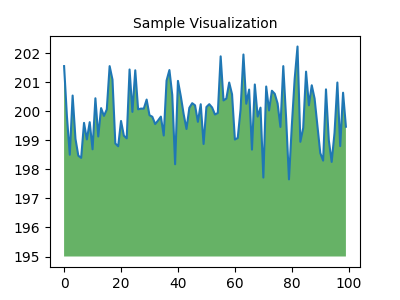

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
